In [1]:
%%html
<style>
div.answertl {
    display: block;
    background-color: #5F9EA0;
    border-color: #5F9EA0;
    border-left: 5px solid #5F9EA0;
    padding: 0.5em;
}
div.answerct {
    display: block;
    background-color: #FFC0CB;
    border-color: #FFC0CB;
    border-left: 5px solid #FFC0CB;
    padding: 0.5em;
}
div.answerty {
    display: block;
    background-color: #DDA0DD;
    border-color: #DDA0DD;
    border-left: 5px solid #DDA0DD;
    padding: 0.5em;
}
div.text_cell_render{
    font-size:14pt;
    }

</style>

# ACSE-3 (Numerical Methods) <a class="tocSkip">

## Coursework 2020-21<a class="tocSkip">
  

# Instructions  <a class="tocSkip">
    

- This is the assessed coursework for module ACSE-3: Numerical Methods for year 2020/21.


- This is independent work, you cannot work in groups.


- Each of the three questions below is equally weighted in terms of marks.


- You will be assessed on both your code as well as your supporting descriptions/discussions of the results you obtain.


- You may use NumPy and SciPy. If you use an algorithm not explicitly mentioned in the question, then please explain which algorithm you are using and why you have chosen it.


- You should submit your solutions as a single self-contained Jupyter notebooks via Github classroom - please submit a version where you have run all of the cells and all the outputs/plots etc are visible without me having to run the notebook myself.
    

<br>
    
- Even if you're not completely sure how to complete a part of the question, my advice is to submit something, even if its just your ideas on how to go about answering the question, as you could well score some marks.


<br><br>

# DEADLINE:   4pm Friday 8 Jan 2021 <a class="tocSkip">

<br><br>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-RK2-family-of-ODE-solvers" data-toc-modified-id="The-RK2-family-of-ODE-solvers-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The RK2 family of ODE solvers</a></span><ul class="toc-item"><li><span><a href="#Answers-for-question-1--[$\star$]" data-toc-modified-id="Answers-for-question-1--[$\star$]"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Answers for question 1 [$\star$]</a></span></li></ul></li><li><span><a href="#Solving-the-unsteady-advection-diffusion-equation-using-the-finite-difference-method" data-toc-modified-id="Solving-the-unsteady-advection-diffusion-equation-using-the-finite-difference-method-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Solving the unsteady advection-diffusion equation using the finite difference method</a></span><ul class="toc-item"><li><span><a href="#Answers-for-question-2--[$\star$]" data-toc-modified-id="Answers-for-question-2--[$\star$]"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Answers for question 2 [$\star$]</a></span></li></ul></li><li><span><a href="#Solving-the-unsteady-advection-diffusion-equation-using-the-finite-element-method" data-toc-modified-id="Solving-the-unsteady-advection-diffusion-equation-using-the-finite-element-method-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Solving the unsteady advection-diffusion equation using the finite element method</a></span><ul class="toc-item"><li><span><a href="#Answers-for-question-3--[$\star$]" data-toc-modified-id="Answers-for-question-3--[$\star$]"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Answers for question 3 [$\star$]</a></span></li></ul></div>

In [2]:
%matplotlib inline
%precision 6
import numpy as np
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation

from matplotlib import rcParams
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d import Axes3D

import scipy.interpolate as si
import scipy.linalg as sl
import scipy.sparse as sp
import scipy.sparse.linalg as spla

# and using some colormaps
from matplotlib import cm
from pprint import pprint
# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# The RK2 family of ODE solvers

Consider the scalar ODE problem

$$\frac{dy}{dt} = f\,(t,{y}(t)),\;\;\;\;\; {y}(0)= {y}_0. $$

<br>

Write a function that implements the RK2 family of ODE solvers given in lecture 6:

\begin{align*}
k_1 & =  f(t_n, y_n), \\[10pt]
k_2 & =  f(t_n + \alpha \Delta t, y_n + \alpha\,\Delta t\, k_1), \\[10pt]
y_{n+1} &= y_n + \left( 1 - \frac{1}{2\alpha}\right)\, \Delta t\, k_1 + 
 \frac{1}{2\alpha} \, \Delta t\, k_2.
\end{align*}


your function should takes in the free parameter $\alpha$.

<br>

For example the first line of your function might read

```Python
def RK2_alpha(f, y0, t0, t_max, dt, alpha=0.5):
```

where `f` is a function of time and the solution $y$:  $f\equiv f(t,y)$.

<br>

Confirm that with the choice $\alpha=1$ your implementation agrees with results from the improved Euler method which was given in lecture 5. 

<br>

Test the convergence rate of your solver using several different values of $\alpha$ using the problem with RHS and exact solutions given by the test case we saw in lecture 6:

$$ y' = y + t^3, \;\;\;\;\;\; y(0) = 1, $$  

which has the exact solution

$$ y(t) = 7\text{e}^t - t^3 - 3t^2 - 6t - 6. $$

You may make use of the following functions implementing these:

```python
def f(t, y):
    return y + t**3

def y_ex(t):
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6
```

<br>

Consider an error metric given by the error in the solution at the final time $t=3$, as well an appropriate norm that assesses the accuracy over the entire time window $[0,3]$.

<br>

Plot your convergence results, compared with results from the forward Euler and the improved Euler methods, and add to the graph your estimates for the order of convergence of each method.

<br>

For a fixed time step size, compute and plot how the error varies as a function of $\alpha$ for values in the range $[0.1,4.0]$. How does this optimal choice vary with the time step size? 

<br>

Comment on the optimal value of $\alpha$ which minimises the error for this problem.

<br>
<br>

[***Hint:*** when using the error metric that is the solution at the final time $t=3$, make sure you check that your final time level actually matches $t=3$ to round off - it's easy to accidently do one too many time steps in your time-stepping loop due to round off errors. An easy way to get around this potential issue is to evaluate the exact solution at your *final time level*, rather than evaluating it at exactly $t=3$, and compare this exact value with your final numerical solution, i.e. calculate the difference `y[-1] - y_ex(t[-1])` rather than `y[-1] - y_ex(3) - I won't mark you down if you use the solution at time $3\pm$ a little bit.]

<div class="answertl">

## Answers for question 1  [$\star$]
<br>
     
</div>

<div class="answerct">

## Coding up the RK2 family function
In the following cell,  for the scalar ODE problem

$$\frac{dy}{dt} = f\,(t,{y}(t)),\;\;\;\;\; {y}(t_{0})= {y}_0. $$

we develop our RK2 function

```Python
def RK2_alpha(f, y0, t0, t_max, dt, alpha=0.5):
```

<br>

taking 5 arguments:


`f` : a function of time and the solution, $f\equiv f(t,y)$<br>
`y0` : the initial condition $y(t_{0})$<br/>
`t0` : the start time<br/>
```t_max``` : the end time<br/>
`dt` : time step size<br/>
`alpha`: the free parameter for RK2 family of ODE solvers, default by 0.5 (Explicit Midpoint)<br/>

   
</div>

In [3]:
#coding up our RK2 family of ODE solvers, taking 5 arguments.
def RK2_alpha(f, y0, t0, t_max, dt, alpha=0.5):
    t = np.arange(t0,t_max+1.e-10,dt)
    y = np.zeros_like(t)
    y[0] = y0
    yi = y[0]
    step = 0
    for step in range(len(t)-1):
        ti = t[step]
        k1 = f(ti, yi)
        k2 = f(ti + alpha*dt, yi + alpha*dt*k1)
        yi += dt*((1 - 1/(2*alpha))*k1 + 1/(2*alpha)*k2)
        y[step + 1] = yi
    return t, y
    

<div class="answerct">

let's define the test case function given:
<br>

$$ y' = y + t^3, \;\;\;\;\;\; y(0) = 1, $$  

as well as the exact solution:

$$ y(t) = 7\text{e}^t - t^3 - 3t^2 - 6t - 6. $$

</div>

In [4]:
# example given by the question
def f(t, y):
    return y + t**3


def y_ex(t):
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6

# define initial value y0
y0 = 1


<div class="answerct">

Let's perform several trials to see if our implementation really works, we set the interval to be $[0,3]$ as requested by the question.   
    
</div>

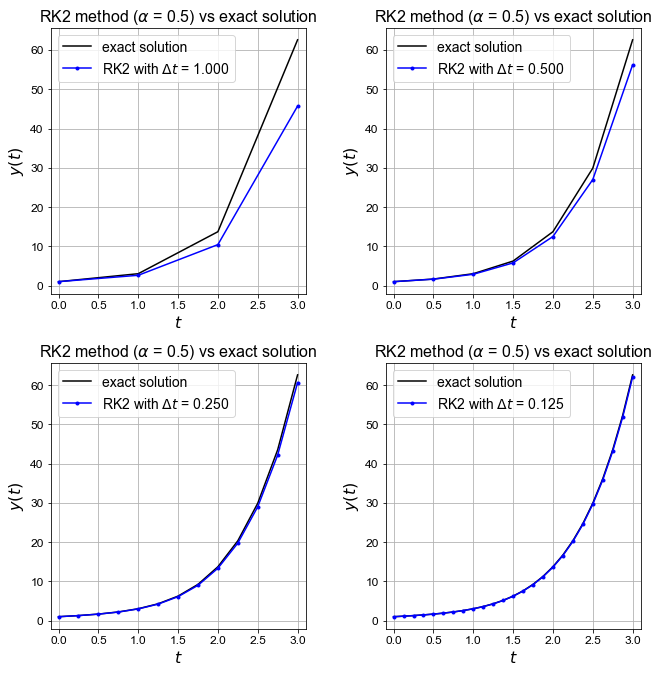

In [5]:
# perform trials with f = y + t^3 , y0 = 1, and fixed interval [0,3] with different choices of dts.
t0 = 0
t_max = 3

dts = [1, 1./2, 1./4, 1./8]
alpha = 0.5


# set up our figs for plotting
fig, axs = plt.subplots(2, 2, figsize=(9, 9))
fig.tight_layout(w_pad=4, h_pad=4)
axs = axs.reshape(-1)

# plot the RK2 approximation as well as the exact solution
for i in range(len(dts)):
    axs[i].set_title(r'RK2 method ($\alpha$ = {0:.1f}) vs exact solution'.format(alpha) , fontsize=16)
    axs[i].set_xlim([-0.1,3.1])
    axs[i].grid(True)
    
    t, b = RK2_alpha(f,y0,t0,t_max,dts[i],alpha)
    axs[i].set_xlabel('$t$', fontsize=16)
    axs[i].set_ylabel('$y(t)$', fontsize=16)
    axs[i].plot(t, y_ex(t), 'k',label='exact solution' )
    axs[i].plot(t, b, 'b.-',label=r'RK2 with $\Delta t$ = {0:.3f}'.format(dts[i]))
    axs[i].legend(loc='best', fontsize=14)

<div class="answerct">

From the graphs above, we could observe that our RK2 implementation does make a preciser approximation as the time step size reduces.
</div>

<div class="answerty">
    
### (Theoretical answer) Comparing the choice of $\alpha = 1$ with improved Euler method 
<br>
Recall from lecture 5, the improved Euler method scheme can be Mathematically written as:

\begin{align*}
    y^* &= y_{n} + \Delta t {f}(t_{n},{y}_{n}), \\[5pt]
    y_{n+1} &= y_{n} + \frac{1}{2} \Delta t \left({f}(t_{n},{y}_{n}) + {f}(t_{n+1},{y}^*)\right).
\end{align*}

substitude $y^*$ into the second equation, we have:
$$
\begin{equation}\begin{split} 
y_{n+1}&=y_{n} + \frac{1}{2} \Delta t \left({f}(t_{n},{y}_{n}) + {f}(t_{n+1},{y}^*)\right) \\ 
&=y_{n} + \frac{1}{2} \Delta t \left({f}(t_{n},{y}_{n}) + {f}\left(t_{n+1},y_{n} + \Delta t {f}(t_{n},{y}_{n})\right)\right) \\ 
& =y_{n} + \frac{1}{2} \Delta t {f}(t_{n},{y}_{n}) + \frac{1}{2} \Delta t {f}\left(t_{n} + \Delta t,y_{n} + \Delta t {f}(t_{n},{y}_{n})\right) \quad \quad & \cdots\cdots ①
\end{split}\end{equation}
$$

<br>

Also, consider $\alpha = 1$ for RK2 method, then we have:

\begin{align*}
k_1 & =  f(t_n, y_n), \\[5pt]
k_2 & =  f(t_n + \Delta t, y_n + \Delta t\, k_1), \\[5pt]
y_{n+1} &= y_n + \left( 1 - \frac{1}{2}\right)\, \Delta t\, k_1 +\frac{1}{2} \, \Delta t\, k_2 \\
        &= y_{n} + \frac{1}{2} \Delta t {f}(t_{n},{y}_{n}) + \frac{1}{2} \Delta t {f}\left(t_{n} + \Delta t,y_{n} + \Delta t {f}(t_{n},{y}_{n})\right) & \cdots\cdots ② 
\end{align*}

Because ① and ② coincide, we conclude that the RK2 method with $\alpha = 1$ is actually equivalent to the improved Euler method.

<br>

We could also write up some codes to see that they are exactly the same thing.


</div>

In [6]:
#write up a function for improved Euler method.
def improved_Euler(f, y0, t0, t_max, dt):
    t = np.arange(t0,t_max+1.e-10,dt)
    y = np.zeros_like(t)
    y[0] = y0
    yi = y[0]
    for step in range(len(t)-1):
        ti = t[step]
        y_star = yi + dt*f(ti,yi)
        yi += 1/2 *dt*(f(ti,yi) + f(ti+dt,y_star))
        y[step + 1] = yi
    return t, y 

#choose different sizes of dt to see RK2 with alpha = 1 produces the same approximation with improved Euler.
dt_1 = (t_max - t0)/ 10

t_euler, y_euler = improved_Euler(f,y0,t0,t_max,dt_1)

t_RK2, y_RK2 = RK2_alpha(f,y0,t0,t_max,dt_1,alpha=1)

print('The approximation for RK2 and improved Euler with time step {0:.1f} coincide: '.format(dt_1), (y_euler == y_RK2).all())


dt_2 = (t_max - t0)/ 100

t_euler, y_euler = improved_Euler(f,y0,t0,t_max,dt_2)

t_RK2, y_RK2 = RK2_alpha(f,y0,t0,t_max,dt_2,alpha=1)

print('The approximation for RK2 and improved Euler with time step {0:.2f} coincide: '.format(dt_2), (y_euler == y_RK2).all())

dt_3 = (t_max - t0)/ 1000

t_euler, y_euler = improved_Euler(f,y0,t0,t_max,dt_3)

t_RK2, y_RK2 = RK2_alpha(f,y0,t0,t_max,dt_3,alpha=1)

print('The approximation for RK2 and improved Euler with time step {0:.3f} coincide: '.format(dt_3), (y_euler == y_RK2).all())




The approximation for RK2 and improved Euler with time step 0.3 coincide:  True
The approximation for RK2 and improved Euler with time step 0.03 coincide:  True
The approximation for RK2 and improved Euler with time step 0.003 coincide:  True


<div class="answerct">

Thus, we conclude that the improved Euler method is equivalent to our coded-up RK2 function by setting $\alpha = 1 $.

</div>

<div class="answerct">
 
## Convergence rate analysis 

Next section we would like to test the convergence rate of our solver.
<br>

</div>

<div class="answerct">

### Introducing our $L_1$ metric

Let's start with a error metric $L_{1}$ related to $y(t = 3)$ (the end point error), which can be mathematically written as (suppose our approximation to be denoted as $\widetilde{y}$ and exact solution to be $y$ ) :
<br>

$$ 
e_{L^1} = L_{1}(\widetilde{y}, y) = |\widetilde{y}(3) - y(3)|
$$
 
<br>
We could make a log-log plot for a range of time step sizes, which give us straight lines for each method. The convergence rates are just the slopes.
</div>

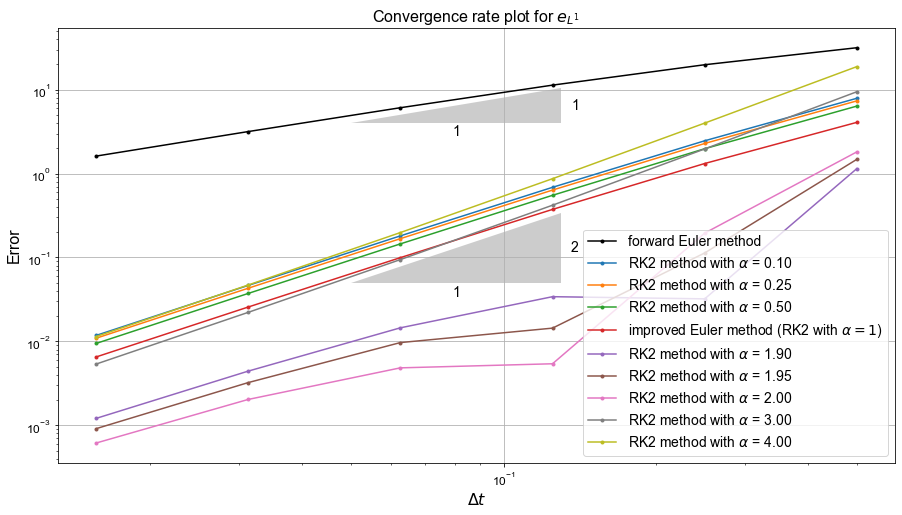

In [7]:
# the range of time step sizes we will consider
dts = [0.5/(2**n) for n in range(0, 6)]

# define our forward Euler solver
def forward_Euler(f, y0, t0, t_max, dt):
    t = np.arange(t0,t_max+1.e-10,dt)
    y = np.zeros_like(t)
    y[0] = y0
    yi = y[0]
    for step in range(len(t)-1):
        ti = t[step]
        yi += dt * f(ti, yi)
        y[step + 1] = yi
    return t, y 


# choose several different values of alphas for our RK2 solver
alphas = [0.1, 0.25, 0.5, 1, 1.9, 1.95, 2, 3, 4]

# set up figure
fig, axs = plt.subplots(1, 1, figsize=(15, 8))

# somewhere to store our errors for each time step size
FE_L1_error = np.empty(len(dts))
RK2_L1_error = np.empty((len(alphas), len(dts)))

# loop over dts and make the convergence rate plot for error metric L1
for (i, dt) in enumerate(dts):
    t_FE, y_FE = forward_Euler(f,y0,t0,t_max,dt)
    FE_L1_error[i] = np.abs(y_FE[-1]-y_ex(t_FE[-1]))
    
    for (j, a) in enumerate(alphas):
        t_RK2, y_RK2 = RK2_alpha(f,y0,t0,t_max,dt,a)
        RK2_L1_error[j, i] = np.abs(y_RK2[-1]-y_ex(t_RK2[-1]))
    
axs.loglog(dts, FE_L1_error, 'k.-', label='forward Euler method')

arg_iFE = alphas.index(1)

for (j, a) in enumerate(alphas):
    if j == arg_iFE:
        locstr = r'improved Euler method (RK2 with $\alpha = 1$)'
    else:
        locstr = r'RK2 method with $\alpha$ = {0:.2f}'.format(a)
    
    axs.loglog(dts, RK2_L1_error[j, :], '.-', label=locstr)
      
axs.set_xlabel('$\Delta t$', fontsize=16)
axs.set_ylabel('Error', fontsize=16)
axs.set_title('Convergence rate plot for $e_{L^1}$', fontsize=16)
axs.grid(True)
axs.legend(loc='best', fontsize=14)
annotation.slope_marker((5e-2, 4e0), (1, 1), ax=axs,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))
annotation.slope_marker((5e-2, 5.0e-2), (2, 1), ax=axs,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))    




<div class="answerct">

From the plot above, we can observe that with respect to the end point error $y(t = 3)$, the forward Euler method has a constant convergence rate of 1, as well as most of the RK2 method (including the improved Euler method) has a constant convergence rate of 2. However, with some special choices of $\alpha$ ($\alpha \in$ {$1.9, 1.95, 2.0$} ) , the RK2 method does not have a consistent convergence rate over $\Delta t$ s, and their accuracy over all fixed $\Delta t$ s outperform the remain choice of $\alpha$ s.


</div>

<div class="answerct">

### Introducing our $L_2$ metric
Besides looking at the error at the final point, we also want to assess the accuracy over the entire time window $[0,3]$.

Here we would like to introduce a new metric $L_{2}$, which is defined by:
\begin{align*} 
e_{L^2} = L_{2}(\widetilde{y}, y) = |\boldsymbol{\widetilde{y} - y}\|_{L_2} = \left(\frac{\sum_{i=1}^N \left(\widetilde{y}(t_i)- y(t_i)\right)^2}{N} \right)^{1/2}
\end{align*} 

our approximation is denoted as $\widetilde{y}$ and exact solution to be $y$, $N$ is the number of numerical approximations over the entire window, depends on $\Delta t$, where $N = \lfloor \frac{t_{max} - t_0}{\Delta t}\rfloor $. 

<br>
It is dimensionless, or say, it makes a fair comparison between vectors with different sizes, without being directly influenced by different size of $\Delta t$ s.

<br>

Recall the definition of RMS error for continuous functions $f, g$ from ACSE-2 lecture 4, 
$$
e_{\text{RMS}} = \| f - g\|_{L^2(I)} = \left( \int_I\, \left[f - g\right]^2\, dx\right)^{1/2} \approx \left( \frac{1}{N} \sum_{i=1}^N  \, \left[f(t_i) - g(t_i)\right]^2 \right)^{1/2}
$$

Thus the error we are estimating is just the discrete version of RMS error. 

<br>

(In addition: according to definitions in Metric Spaces, $L_{2}$ is indeed the $d_{L_2}$ Euclidean metric for vector\sequences, it can be suitably implemented just using the Python command `np.linalg.norm` very happily! )
</div>

<div class="answerct">

Similar to what we done for the $L_1$ metric, we make a log-log plot for each method according to the $L_2$ metric to see their convergence rate.

</div>

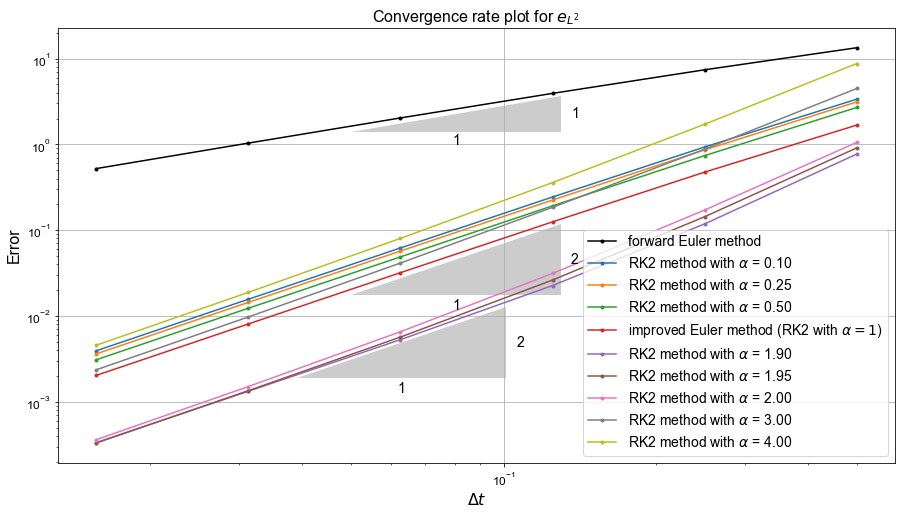

In [8]:
# set up figure
fig, axs = plt.subplots(1, 1, figsize=(15, 8))

# somewhere to store our errors for each time step size
FE_L2_error = np.empty(len(dts))
RK2_L2_error = np.empty((len(alphas), len(dts)))

# loop over dts and make the convergence rate plot for error metric L2
for (i, dt) in enumerate(dts):
    t_FE, y_FE = forward_Euler(f,y0,t0,t_max,dt)
    FE_L2_error[i] = np.linalg.norm(y_FE - y_ex(t_FE))/np.sqrt(len(t_FE))
    
    for (j, a) in enumerate(alphas):
        t_RK2, y_RK2 = RK2_alpha(f,y0,t0,t_max,dt,a)
        RK2_L2_error[j, i] = np.linalg.norm(y_RK2 - y_ex(t_RK2))/np.sqrt(len(t_RK2))
    
axs.loglog(dts, FE_L2_error, 'k.-', label='forward Euler method')

for (j, a) in enumerate(alphas):
    if j == arg_iFE:
        locstr = r'improved Euler method (RK2 with $\alpha = 1$)'
    else:
        locstr = r'RK2 method with $\alpha$ = {0:.2f}'.format(a)
    
    axs.loglog(dts, RK2_L2_error[j, :], '.-', label=locstr)
      
axs.set_xlabel('$\Delta t$', fontsize=16)
axs.set_ylabel('Error', fontsize=16)
axs.set_title(r'Convergence rate plot for $e_{L^2}$', fontsize=16)
axs.grid(True)
axs.legend(loc='best', fontsize=14)
annotation.slope_marker((5e-2, 1.4e0), (1, 1), ax=axs,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))
annotation.slope_marker((5e-2, 1.75e-2), (2, 1), ax=axs,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))    
annotation.slope_marker((3.9e-2, 1.9e-3), (2, 1), ax=axs,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))  



<div class="answerct">

we see that the Euler method keeps a constant convergence rate of 1, and surprisingly all the RK2 methods seem to have a consistant convergence rate of 2 w.r.t $L_2$ metric. Those groups of which $\alpha$ lies between $[1.9, 2.0]$ still outperform other groups in accuracy.

</div>

<div class="answerct">

## Finding the optimal $\alpha$

From the result above, we will naturally draw a question: How to find an optimal $\alpha$ for a fixed time step size? 
<br>

The answer may not seem that trivial, as we neither achieve the minimum error at the biggest/smallest $\alpha$, but somewhere in between.

To better understanding the situation, we could just choose a set of fixed $\Delta t$ s, varying parameter $\alpha$ from $0.1$ to $4$ and comparing their $e_{L^1}$ and $e_{L^2}$ s.
</div>

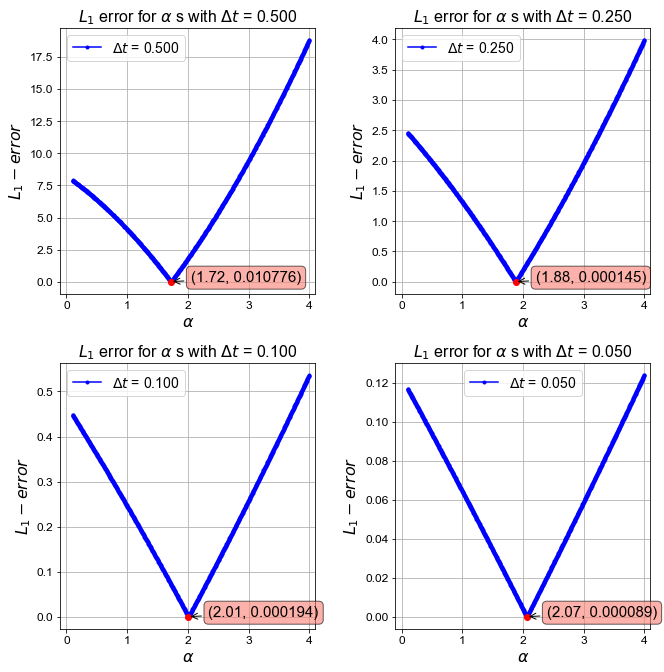

In [9]:
# set up figure
fig, axs = plt.subplots(2, 2, figsize=(9, 9))
fig.tight_layout(w_pad=4, h_pad=4)
axs = axs.reshape(-1)

# define our quasi-continuous region for alpha, as the question required.
alphas = np.arange(0.1, 4+1.e-10, 0.005)

# choose a casual set of dts.
dts = [0.5, 0.25, 0.1, 0.05]

# making plots of L1 errors for fixed dts.
for i in range(len(dts)):
    axs[i].set_title(r'$L_1$ error for $\alpha$ s with $\Delta t$ = {0:.3f}'.format(dts[i]) , fontsize=16)
    axs[i].set_xlim([-0.1,4.1])
    axs[i].grid(True)
    L1_a_error = np.zeros_like(alphas)
    
    for (ai, a) in enumerate(alphas):
        t, b = RK2_alpha(f,y0,t0,t_max,dts[i],a)
        L1_a_error[ai] = np.abs(b[-1]-y_ex(t[-1]))
    
    axs[i].set_xlabel(r'$\alpha$', fontsize=16)
    axs[i].set_ylabel(r'$L_{1}-error$', fontsize=16)
    axs[i].plot(alphas, L1_a_error, 'b.-',label=r'$\Delta t$ = {0:.3f}'.format(dts[i]))
    a_min, error_min = alphas[np.argmin(L1_a_error)], min(L1_a_error)
    axs[i].plot(a_min, error_min,'ro')

    off1 = 20
    off2 = 0
    bbox = dict(boxstyle="round", fc='salmon', alpha=0.6)
    arrowprops = dict(arrowstyle="->", connectionstyle="arc3,rad=0.")
    annotation = axs[i].annotate(('({0:.2f}, {1:.6f})'.format(a_min, error_min)), xy=(a_min, error_min), xytext=(off1, off2), textcoords='offset points',
                              bbox=bbox, arrowprops=arrowprops, size=15)
    annotation.set_visible(True)
    
    axs[i].legend(loc='best', fontsize=14)

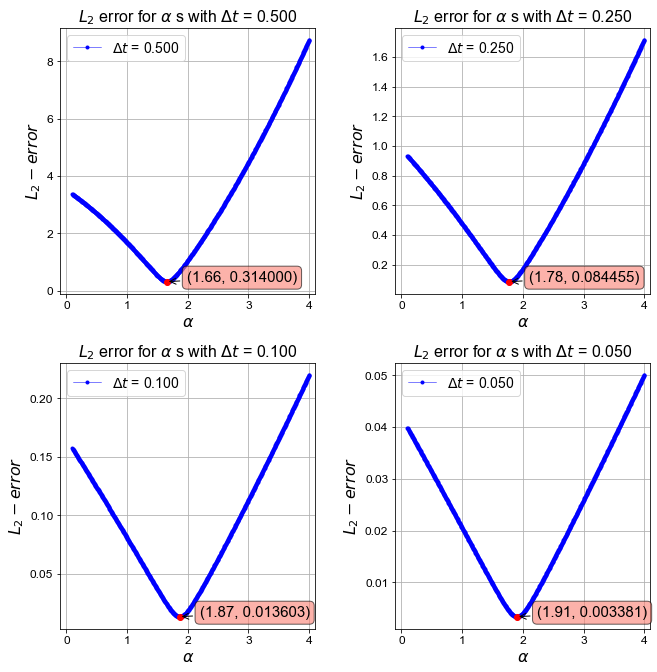

In [10]:
# set up figure
fig, axs = plt.subplots(2, 2, figsize=(9, 9))
fig.tight_layout(w_pad=4, h_pad=4)
axs = axs.reshape(-1)

# define our quasi-continuous region for alpha, as the question required.
alphas = np.arange(0.1, 4+1.e-10, 0.005)

# choose a casual set of dts.
dts = [0.5, 0.25, 0.1, 0.05]

# making plots of L1 errors for fixed dts.
for i in range(len(dts)):
    axs[i].set_title(r'$L_2$ error for $\alpha$ s with $\Delta t$ = {0:.3f}'.format(dts[i]) , fontsize=16)
    axs[i].set_xlim([-0.1,4.1])
    axs[i].grid(True)
    L2_a_error = np.zeros_like(alphas)
    
    for (ai, a) in enumerate(alphas):
        t, b = RK2_alpha(f,y0,t0,t_max,dts[i],a)
        L2_a_error[ai] = np.linalg.norm(b - y_ex(t))/np.sqrt(len(t))
        
    axs[i].plot(alphas, L2_a_error, 'b.-',label=r'$\Delta t$ = {0:.3f}'.format(dts[i]), linewidth=0.5)
    a_min, error_min = alphas[np.argmin(L2_a_error)], min(L2_a_error)
    axs[i].plot(a_min, error_min,'ro')

    off1 = 20
    off2 = 0
    bbox = dict(boxstyle="round", fc='salmon', alpha=0.6)
    arrowprops = dict(arrowstyle="->", connectionstyle="arc3,rad=0.")
    annotation = axs[i].annotate(('({0:.2f}, {1:.6f})'.format(a_min, error_min)), xy=(a_min, error_min), xytext=(off1, off2), textcoords='offset points',
                              bbox=bbox, arrowprops=arrowprops, size=15)
    annotation.set_visible(True)

    axs[i].set_xlabel(r'$\alpha$', fontsize=16)
    axs[i].set_ylabel(r'$L_{2}-error$', fontsize=16)
    axs[i].legend(loc='best', fontsize=14)

<div class="answerct">

From those two plots above we could observe that both $e_{L^1}$ and $e_{L^2}$ for these $4$ fixed dts drop to the minimum (may be local, because we only vary $\alpha \in [0.1, 4]$ ), and all the $\alpha$ s for the minimum are vary close to each other, lies in the interval $[1.6, 2.0]$. 
<br>

Is it just a coincidence for those 4 discrete value of $\Delta t$ s, or the optimal choice of $\alpha$ actually lies in such a small interval for a continuous region of $\Delta t$ s?
</div>

<div class="answerct">

## $3D-$plots for the errors depending on $\alpha$ and $\Delta t$
<br>

To verify our ambitious guess, we need to inspect the $e_{L^1}$ and $e_{L^2}$ value corresponding to the pair $(\alpha, \Delta t)$ over a continuous region, that is, to extract $e_{L^1} (e_{L^2})$ as a surface from a $3-$ dimension space.
<br>

To implement the $3D-$plot, we make use of the `waterfall_plot` function in ACSE-3 lecture 8.

[***Mention***: to run the cell below, the default parameter for `alphas` and `dts` takes 3 miniutes, it's normal because the refinement I use is very thin.]
</div>

In [11]:
# the range of alphas and dts we will consider, a region of the bottom plane.
alphas = np.arange(0.1, 4+1.e-10, 0.005)
dts = np.arange(0.001, 0.5 + 1.e-10, 0.001)

# making a meshgrid, convenient for waterfall_plot function to work.
A, T = np.meshgrid(alphas,dts)

# a 2D - ndarray, somewhere to store our errors for each alpha and time step size.
RK2_L1_error = np.empty((len(alphas), len(dts)))
RK2_L2_error = np.empty((len(alphas), len(dts)))

# looping over alphas and dts, evaluate corresponding error value.
def L1_error(A, T):
    E = np.zeros_like(A)
    for ia in range(A.shape[0]):
        for ja in range(A.shape[1]):
            t_RK2, y_RK2 = RK2_alpha(f,y0,t0,t_max,T[ia][ja],A[ia][ja])   
            E[ia][ja] = np.abs(y_RK2[-1]-y_ex(t_RK2[-1]))
    return E

def L2_error(A, T):
    E = np.zeros_like(A)
    for ia in range(A.shape[0]):
        for ja in range(A.shape[1]):
            t_RK2, y_RK2 = RK2_alpha(f,y0,t0,t_max,T[ia][ja],A[ia][ja])   
            E[ia][ja] = np.linalg.norm(y_RK2 - y_ex(t_RK2))/np.sqrt(len(t_RK2))
    return E

# just making use of the waterfall_plot funnction in ACSE-3 lecture 8, a slight changes, thanks to Prof. Piggott
def waterfall_plot(fig,ax,X,Y,Z,**kwargs):
    '''
    Make a waterfall plot
    Input:
        fig,ax : matplotlib figure and axes to populate
        Z : n,m numpy array. Must be a 2d array even if only one line should be plotted
        X,Y : n,m array
        kwargs : kwargs are directly passed to the LineCollection object
    '''
    # Set normalization to the same values for all plots
    norm = plt.Normalize(Z.min().min(), Z.max().max())
    # Check sizes to loop always over the smallest dimension
    n,m = Z.shape
    if n>m:
        X=X.T; Y=Y.T; Z=Z.T
        m,n = n,m
    
    sc = min(n,m)
    min_alpha = np.zeros((sc, 2))
    
    for j in range(n):
        # find the minimum of error and correspoding alpha for each fixed dt
        min_alpha[j,:] = [X[j,np.argmin(Z[j,:])], min(Z[j,:])]
        # reshape the X,Z into pairs 
        points = np.array([X[j,:], Z[j,:]]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        # The values used by the colormap are the input to the array parameter
        lc = LineCollection(segments, cmap='rainbow', norm=norm, array=(Z[j,1:]+Z[j,:-1])/2, **kwargs)
        line = ax.add_collection3d(lc,zs=(Y[j,1:]+Y[j,:-1])/2, zdir='y') # add line to axes
    

    fig.colorbar(lc) # add colorbar, as the normalization is the same for all
    # it doesent matter which of the lc objects we use
    ax.auto_scale_xyz(X,Y,Z) # set axis limits
    
    return min_alpha
    
# calculating (will be less time costy if we specify a coarser mesh for the region, but the plot will be wrose)
L1_error_3D = L1_error(A,T)
L2_error_3D = L2_error(A,T)


<div class="answerct">

Note that we set our region for $\Delta t$ s as $[0.001, 0.5]$, it's a reasonable region to focus on, as a larger size of $\Delta t$ will surely lead to a bad approximation overall while a too smaller one leads to huge computational cost.
<br>

The two plots for $e_{L^1}$ and $e_{L^2}$ are shown below:


</div>

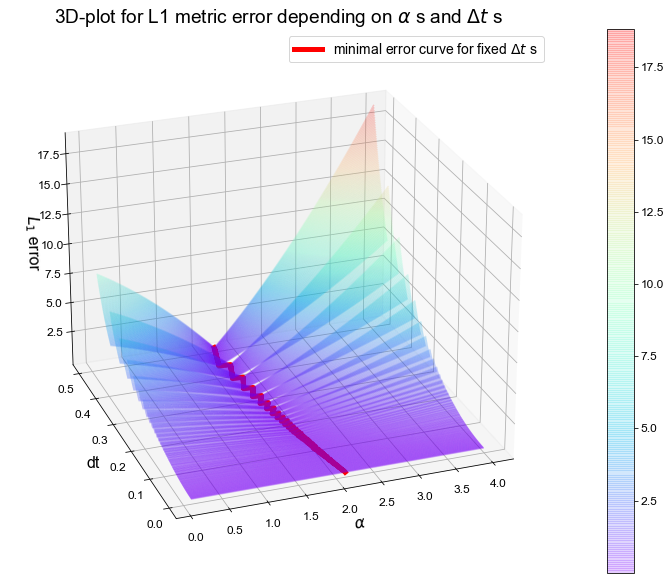

In [12]:
# set up figure
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# make the 3D-plot for L1 metric
plot_1 = waterfall_plot(fig,ax,A,T,L1_error_3D,linewidth=1.5,alpha=0.2)

ax.set_title(r'3D-plot for L1 metric error depending on $\alpha$ s and $\Delta t$ s', fontsize=19)
ax.plot(plot_1[:,0], T[:, 0], plot_1[:,1], label=r'minimal error curve for fixed $\Delta t$ s',color='r',linewidth=5,alpha = 1)
ax.legend(loc='best', fontsize=14)
ax.set_xlabel(r'$\alpha$', fontsize=16)
ax.set_ylabel('dt', fontsize=16)
ax.set_zlabel('$L_{1}$ error', fontsize=16) 
#fig.tight_layout()
ax.view_init(elev=25, azim=-110)

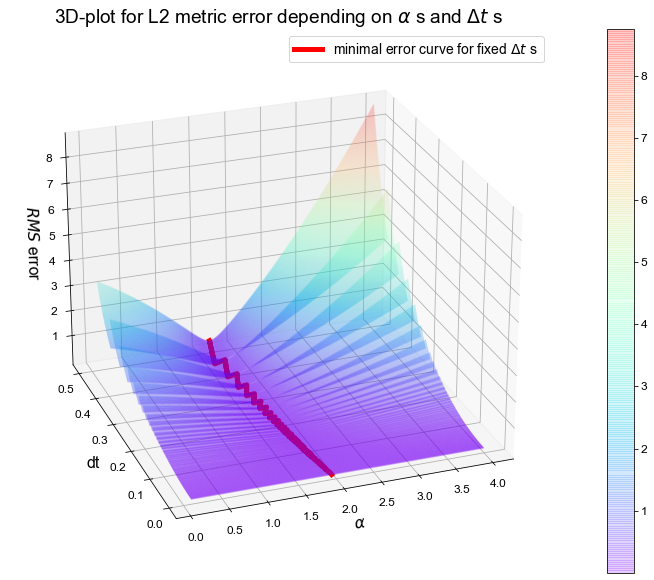

In [13]:
# set up figure
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# make the 3D-plot for L2 metric
plot_2 = waterfall_plot(fig,ax,A,T,L2_error_3D,linewidth=1.5,alpha=0.2)

ax.set_title(r'3D-plot for L2 metric error depending on $\alpha$ s and $\Delta t$ s', fontsize=19)
ax.plot(plot_2[:,0], T[:, 0], plot_2[:,1], label=r'minimal error curve for fixed $\Delta t$ s',color='r',linewidth=5,alpha = 1)
ax.legend(loc='best', fontsize=14)
ax.set_xlabel(r'$\alpha$', fontsize=16)
ax.set_ylabel('dt', fontsize=16)
ax.set_zlabel('$RMS$ error', fontsize=16) 
#fig.tight_layout()
ax.view_init(elev=25, azim=-110)

<div class="answerct">

The curves for $\alpha$ reaching the minimum for fixed $\Delta t$ s are marked as $\color{#FF0000}{red}$ in the plots.

</div>

<div class="answerct">

### Extracting the 2D-relationship between the optimal $\alpha$ and $\Delta t$

As we focus more on the value of optimal $\alpha$ s instead of the actual value of minimal errors, we could make projection of those $3D-$ plots to the bottom plane to exact the binary relation of the optimal $\alpha$ and $\Delta t$:

</div>

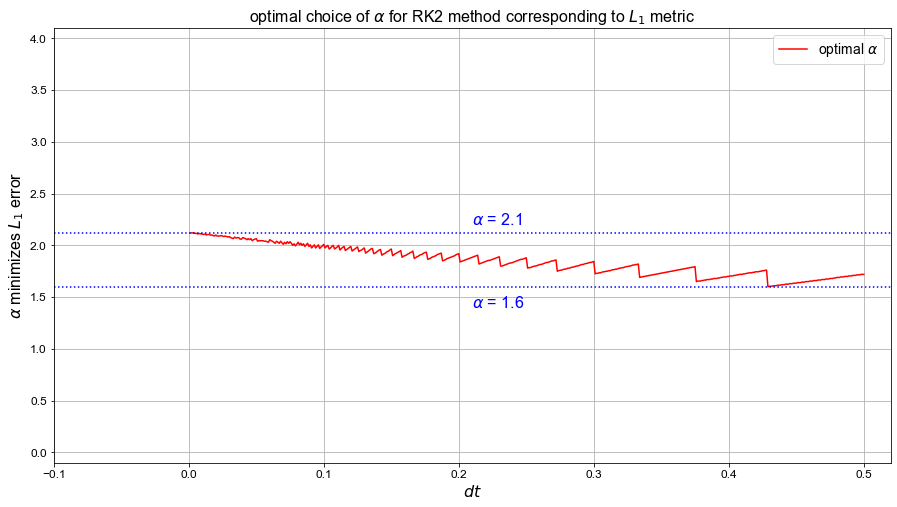

In [14]:
# set up figure
fig, axs = plt.subplots(1, 1, figsize=(15, 8))

# make 2D-plot of optimal alpha and dt for L1 metric
axs.set_title(r'optimal choice of $\alpha$ for RK2 method corresponding to $L_{1}$ metric' , fontsize=16)
axs.set_xlim([-0.1, 0.52])
axs.set_ylim([-0.1, 4.1])
axs.grid(True)
    
x, y = T[:, 0], plot_1[:,0]
ys = max(plot_1[:,0])
yi = min(plot_1[:,0])
axs.plot(x, y, 'r',label=r'optimal $\alpha$' )
axs.plot([-0.1, 4.1], [ys, ys], 'b:');
axs.plot([-0.1, 4.1], [yi, yi], 'b:');
text1 = axs.text(x = 0.21, y=2.2, s=r'$\alpha$ = {0:.1f}'.format(ys), fontdict=dict(fontsize=16, color='b'))
text2 = axs.text(x = 0.21, y=1.4, s=r'$\alpha$ = {0:.1f}'.format(yi), fontdict=dict(fontsize=16, color='b'))
axs.set_xlabel('$dt$', fontsize=16)
axs.set_ylabel(r'$\alpha$ minimizes $L_1$ error', fontsize=16)
axs.legend(loc='best', fontsize=14)



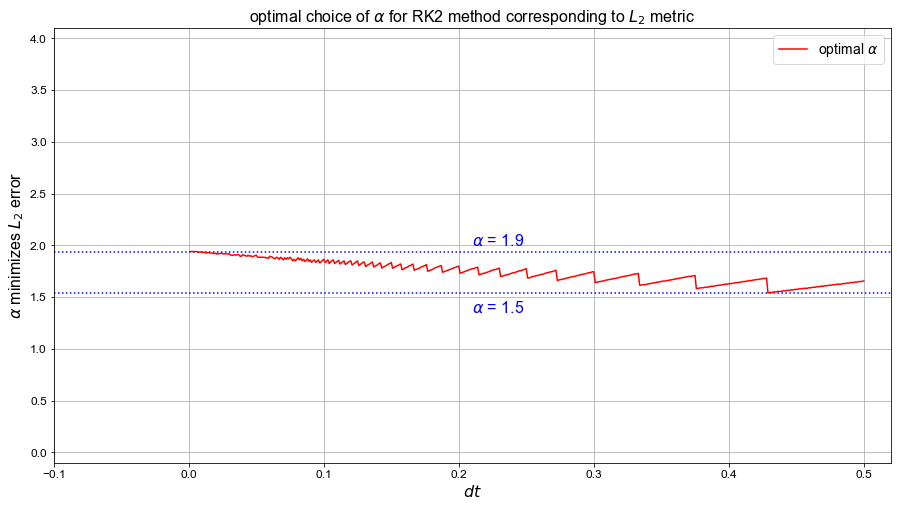

In [15]:
# set up figure
fig, axs = plt.subplots(1, 1, figsize=(15, 8))

# make 2D-plot of optimal alpha and dt for L2 metric
axs.set_title(r'optimal choice of $\alpha$ for RK2 method corresponding to $L_{2}$ metric' , fontsize=16)
axs.set_xlim([-0.1, 0.52])
axs.set_ylim([-0.1, 4.1])
axs.grid(True)
    
x, y = T[:, 0], plot_2[:,0]
ys = max(plot_2[:,0])
yi = min(plot_2[:,0])
axs.plot([-0.1, 4.1], [ys, ys], 'b:');
axs.plot([-0.1, 4.1], [yi, yi], 'b:');
text1 = axs.text(x = 0.21, y=2.0, s=r'$\alpha$ = {0:.1f}'.format(ys), fontdict=dict(fontsize=16, color='b'))
text2 = axs.text(x = 0.21, y=1.35, s=r'$\alpha$ = {0:.1f}'.format(yi), fontdict=dict(fontsize=16, color='b'))
axs.plot(x, y, 'r',label=r'optimal $\alpha$' )
axs.set_xlabel('$dt$', fontsize=16)
axs.set_ylabel(r'$\alpha$ minimizes $L_2$ error', fontsize=16)
axs.legend(loc='best', fontsize=14)

<div class="answerct">

## Final comments on choosing an optimal $\alpha$
We see that the optimal $\alpha$ for $e_{L^1}$ lies in the interval $[1.6, 2.1]$, and the optimal $\alpha$ for $e_{L^1}$ lies in the interval $[1.5, 1.9]$. 
<br>

Moreover, both curves start at the upper bound when $\Delta t$ starts as a very small value, say $0.001$ in our implementation, and then perturbate down a little bit when $\Delta t$ increases. It is reasonable to conclude that it is bounded above, and we don't really care when 
$\Delta t$ become very large because too large $\Delta t$ s always give us bad numerical approximations!

Combine these two results, we can conclude that the RK2 solver with an $\alpha$ value between 1.7 and 1.9 would be a very good choice for this problem.
</div>

#  Solving the unsteady advection-diffusion equation using the finite difference method

<br>

This question involves the solution of the unsteady advection-diffusion equation in one spatial dimension using central finite difference schemes in space and both explicit and implicit schemes in time.

<br>

As a starting point consider the code and test case presented in the Lecture 8 homework question 2 "*An analytical solution to advection-diffusion*". There I explained how an appropriate Gaussian function can be considered as an exact solution to the advection-diffusion problem as long as we initialise our solution with the Gaussian evaluated at some $t>0$ (since in the limit of $t=0$ the solution is a Dirac-delta function which we can't represent on a finite mesh). We can then use the same function evaluated at the appropriate later time as an exact solution to compare our numerical method against.


<br>

Write some code to implement the FTCS, BTCS, and Crank-Nicolson schemes (described in lecture 8) for advection-diffusion using the finite difference method.   As this problem is linear you can just rearrange and solve the resulting matrix system using a linear solver, i.e. you do not need to resort to use of a full nonlinear solver (unless you want to).

<br>

It's up to you how you go about doing this, but one option would be to start from the code used in the homework exercise mentioned above that implemented FTCS using periodic BCs.

<br>

Verify the correctness of your implementations using the test case/analytical solution presented in the homework question, note that that test specifies a domain size, an advecting velocity and a time period such that the Gaussian doesn't interact with the periodic boundary (it therefore doesn't matter here if your implementation assumes periodic or some other boundary condition).
~

<br>

What theoretical orders of accuracy do you expect for your three solvers with respect to the mesh spacing and the time step (i.e. assuming the error can be decomposed in the following way: $\,\text{error} = \mathcal{O}(\Delta x^p) +  \mathcal{O}(\Delta t^q)$, what do you expect $p$ and $q$ to be in each case?)


<br>

Try to confirm these theoretical orders of accuracy through convergence analyses of your three solvers by appropriately varying the mesh spacing and/or the time step in a series of experiments.


<br>

[***Hint***: you will get maximum marks here based on your methodology, not how well you manage to demonstrate the perfect expected orders of convergence.  Also note that to investigate convergence with respect to dx you should set a fixed dt sufficiently small that the spatial error dominates, and when investigating convergence with respect to dt you should set a fixed dx sufficiently small that the time-stepping error dominates. If you don't do this then the two error contributions will "pollute" one another making it more difficult to establish the individual expected convergence rates.]

<div class="answertl">

## Answers for question 2  [$\star$]
<br>
     
</div>

<div class="answerct">
    
## Specify the problem (equation, variables, conditions)
<br>

The PDE equation for unsteady advection-diffusion problem in one-dimension (1D) can be written as:
$$\frac{\partial c}{\partial t} + U\frac{\partial c}{\partial x} = \kappa\frac{\partial^2 c}{\partial x^2}, $$

where we have the following variables:

$t$: time.<br>
$x$: our single space dimension.<br>
$c$: concentration of some quantity depend on $t$ and $x$, can be denoted as $c(t, x)$.<br>
<br>

as well as two scalar constants:<br>


$U$: advection velocity (a scalar as we're in one spatial dimension)<br>
$\kappa$ : diffusivity.<br>

To fully prescribe this problem we need an initial condition:

$$c(x,t_0)=c^{t_0}(x),$$

where $c^{t_0}(x)$ is a prescribed function of the spatial coordinate only, and we use superscripts to indicate a location in time (most of the time we will assume the initial time is $t_0=0$, but in this problem we pick a $t_0\neq0$ as the initial condition $t_0=0$ for Gaussian is hard to represent).

To fully describe our problem we need to also prescribe boundary conditions, suppose the region of x is 
$[0, L]$, the Dirichlet conditions are usually used:  
$$c(0,t) = 0, \;\;\;\;\;\; c(L,t)=c_E $$

As well as the periodic conditions:

$$c(0,t) = c(L,t)$$

    
</div>

<div class="answerct">

# Exact solution for validation
As given in lecture 8 homework problem 2, an exact solution to the advection-diffusion equation is given by:
$$ c_{ex} (x,t) = \frac{1}{\sqrt{4\pi \, \kappa \,t}}\exp\left  (-\frac{(x-Ut)^2}{4\kappa \, t}\right).$$
<br>
Note that this holds in an infinite domain - we can make use of it only as long as our numerical solution is 1) far away from boundaries (suppose our region is defined to be $[x_0, x_1]$ with $L = x_1 - x_0$):<br>

$$U\cdot t_{end}\lt x_{1}$$ 
<br>
or 2) in a periodic domain as long as the solution behaviour does not start to encroach on itself.
<br>

In this question, we will perform tests specifying a domain size, an advecting velocity and a time period such that the Gaussian doesn't interact with the boundary. Thus, the boundary condition is not that important. We could just consider creating mesh for the periodic boundary problem.     
    
</div>

In [16]:
# define the exact solution function
def c_ex(U, kappa, x0, x, t):
    """ Analtical solution to advection-diffusion for an assumed 
    Dirac-delta initial condition at t=0.
    
    x0: the initial location where c > 0 as t -> 0.
    """
    return np.exp( -((x-x0) - U*t)**2 / (4.*kappa*t)) / np.sqrt(4. * np.pi * kappa * t)

<div class="answerct">

## Defining time-space mesh for the system
<br>
We prescribe mesh points for space and time as $\Delta x$ and $\Delta t$. Because we suppose our boundary is periodic, we have $N$ nodes for space as $N=\frac{L}{\Delta x}$.

<img src="stencil.svg" style="width: 600px">

\begin{align*}
x_i & := i \, \Delta x,   \;\;\;\;\textrm{for}\;\;\;\;  i=0,\ldots,N-1\\
t^n & := n\,\Delta t \;\;\;\;\textrm{for}\;\;\;\;  n=0,1,\ldots
\end{align*}

</div>

<div class="answerct">

## Discretised equations for space (assuming periodic boundary)

Considering the PDE at location $x_i$, we can discretise using central differences in space for both advection and diffusion to give 

<br> 
$$\frac{\partial c_i}{\partial t} = \kappa\frac{c_{i+1} - 2c_i + c_{i-1}}{\Delta x^2} - U\frac{c_{i+1} - c_{i-1}}{2\Delta x}  , $$
where
$$c_i \equiv c_i(t) \approx c(x_i,t). $$

recall that the spatial truncation error with this discretisation is $\mathcal{O}({\Delta x^2})$.

Our ***semi-discretised system*** thus takes the form

\begin{equation}
  \begin{cases}
\frac{\partial c_0}{\partial t} &= \kappa\frac{c_{1} - 2c_0 + c_{N-1}}{\Delta x^2} -  U\frac{c_{1} - c_{N-1}}{2\Delta x} \\
\frac{\partial c_1}{\partial t}  & = \kappa\frac{c_{2} - 2c_1 + c_{0}}{\Delta x^2} -  U\frac{c_{2} - c_{0}}{2\Delta x} \\
\vdots \\[5pt]
\frac{\partial c_{N-1}}{\partial t}  & = \kappa\frac{c_{0} - 2c_{N-1} + c_{N-2}}{\Delta x^2} -  U\frac{c_{0} - c_{N-2}}{2\Delta x} ,
  \end{cases}
\end{equation}
<br>
so the semi-discrete ODE system can be written as

$$\frac{d\boldsymbol{c}}{dt} = A \, \boldsymbol{c},$$

and

$$A = -\frac{U}{\Delta x}\, D_{x} + \frac{\kappa}{{\Delta x}^2}\, D_{xx}$$

where

$$
\boldsymbol{c} = \begin{pmatrix}
c_0\\
c_1\\
\vdots\\
c_{N-1}
\end{pmatrix}
$$
<br>

$$D_x = \begin{pmatrix}
     -1/2 & 0 & 1/2 & &      \\
     \ddots & \ddots & \ddots &  &    \\    
     & -1/2 & 0 & 1/2 &     \\  
     &  & \ddots & \ddots  &  \ddots  \\  
     & & & -1/2 & 0 & 1/2   \\ 
\end{pmatrix}$$

<br>


$$D_{xx} = \begin{pmatrix}
     1 & -2 & 1 & &      \\
     \ddots & \ddots & \ddots &  &    \\    
     & 1 & -2 & 1 &           \\  
     &  & \ddots & \ddots  &  \ddots  \\  
     & & & 1 & -2 & 1   \\ 
\end{pmatrix}$$


</div>

In [17]:
# write Dx and Dxx matrices for our discretised space, utilising codes from ACSE-3 lecture 8 homework.

def adv_central_periodic(N):
    # advection - periodic
    Dx = 0.5*np.eye(N, k=1) - 0.5*np.eye(N, k=-1)
    # Add in the wrapped values due to periodicity
    Dx[0, -1] = -0.5
    Dx[-1, 0] = 0.5
    return Dx

def diff_central_periodic(N):
    # diffusion - periodic
    Dxx = np.eye(N, k=1) - 2*np.eye(N) + np.eye(N, k=-1)
    # Add in the wrapped values due to periodicity
    Dxx[0, -1] = 1
    Dxx[-1, 0] = 1
    return Dxx


<div class="answerct">

## Discretised equations for time 

As for time-stepping, we offer three options for our "centred in space" spatial mesh:

\begin{align}
\frac{\boldsymbol{c}^{n+1} - \boldsymbol{c}^{n}}{\Delta t} &= A\boldsymbol{c}^{n}\;\; && \text{FTCS: forward in time (FE, or RK1/AB1), central in space}\\ 
\frac{\boldsymbol{c}^{n+1} - \boldsymbol{c}^{n}}{\Delta t} &= A\boldsymbol{c}^{n+1}\;\; &&  \text{BTCS: backward in time (BE, or AM0), central in space}\\
\frac{\boldsymbol{c}^{n+1} - \boldsymbol{c}^{n}}{\Delta t} &= \frac{1}{2}A\left(\boldsymbol{c}^{n+1} + \boldsymbol{c}^{n}\right)\;\; &&  \text{Crank-Nicolson (AM2)}
\end{align}

Previously we define the RHS matrix to be  $A = -\frac{U}{\Delta x}\, D_{x} + \frac{\kappa}{{\Delta x}^2}\, D_{xx}$, thus we could code up functions to update $\boldsymbol{c}$ for each of these three schemes.
<br>

In the following cell, we will develop different functions for each scheme depending on their amplification factors.

</div>

In [18]:
# update time stages for FTCS
def time_update_FTCS(C, A, t, dt, I):
    amp = I + A * dt
    for n in range(len(t)-1):
        C[:,n+1] = amp @ C[:,n]

# update time stages for BTCS
def time_update_BTCS(C, A, t, dt, I):
    amp = np.linalg.inv(I - A * dt)
    for n in range(len(t)-1):
        C[:,n+1] = amp @ C[:,n]
        
# update time stages for Crank-Nicolson
def time_update_CN(C, A, t, dt, I):
    amp = np.dot(np.linalg.inv(I - 1/2 * A * dt), I + 1/2 * A * dt)
    for n in range(len(t)-1):
        C[:,n+1] = amp @ C[:,n]

<div class="answerct">

# Coding up our solver





</div>

<div class="answerct">

## Coding up the advection-diffision solver
In the following cell,  we will write our PDE solver, adapting from the function <br>
`solve_adv_diff_Gaussian3` from ACSE-3 lecture 8 homework.

```Python
def adv_diff_Gaussian_3solver(dx, dt, t_start, t_end, U, kappa, scheme):
```

<br>

taking 7 arguments:


`dx` : the size of our spatial mesh <br/>
`dt` : the time step size <br/>
`t_start` : the start time<br/>
```t_end``` : the end time<br/>
`U` : advection velocity, a scalar <br/>
`kappa`: diffusivity, a scalar <br/>
`scheme`: the time step scheme we want to use, taking strings 'FTCS', 'BTCS', 'CN' (Crank-Nicolson).

   
</div>

In [19]:
# getting inspiration from the lecture 8 homework
def adv_diff_Gaussian_3solver(dx, dt, t_start, t_end, U, kappa, scheme):
    """ Solve the advection-diffusion problem on a periodic domain
    with a hard coded Gaussian-shaped initial condition.
    
    Uses:
    dx: size of our uniform spatial mesh
    dt: time step size
    t_start: start time
    t_end: end time
    U: advection volocity   
    kappa: diffusivity   
    scheme: the time stepping method we use 
    ('FTCS' for forward Euler, 'BTCS' for is implicit Euler, 'CN' for is Crank-Nicolson)
    
    Returns:
    C - the solution at all time levels.
    x - the spatial mesh.
    t - the time levels.
    """
    # define spatial mesh
    x = np.arange(0, L+1e-10, dx)
    N = len(x)   
    # create discretisation matrix
    Dx = adv_central_periodic(N)
    Dxx = diff_central_periodic(N)
    A = -(U / dx) * Dx + (kappa / dx**2) * Dxx

    t = np.arange(t_start, t_end, dt)
    
    C = np.empty((len(x), len(t)))
    
    # define an initial condition
    C[:,0] = c_ex(U, kappa, x0, x, t_start)
    
    I = np.eye(len(x))
    
    if scheme == 'FTCS':
        time_update_FTCS(C, A, t, dt, I)
    elif scheme == 'BTCS':
        time_update_BTCS(C, A, t, dt, I)
    elif scheme == 'CN':
        time_update_CN(C, A, t, dt, I)
        
    return C, x, t

<div class="answerct">

## Testing, verification and simple comparison between three methods

Next, we will verify the correctness of our implementations, using exactly the same test case/analytical solution presented in the homework question.

</div>

In [20]:
# defining the conditions for the problem, as the same as the test case given in lecture 8 homework.
U = 1
kappa = 1./100.
N = 500
L = 10.
dx = L / N
dt = 0.01
t_start = 2.
t_end = t_start + 4.
x0 = 1.0

<div class="answerct">

### FTCS
</div>

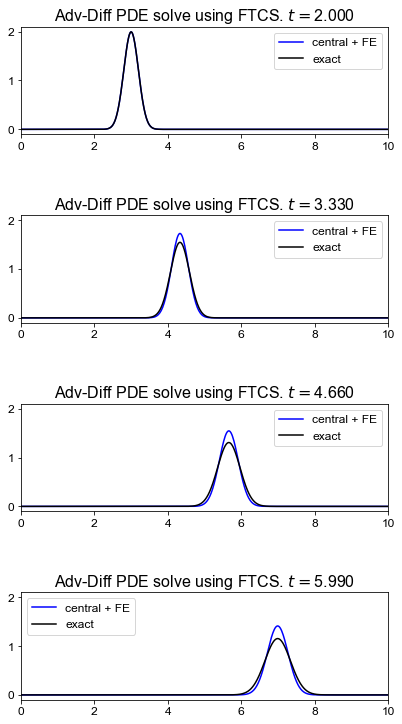

In [21]:
# solve using FTCS
C, x, t = adv_diff_Gaussian_3solver(dx, dt, t_start, t_end, U, kappa, 'FTCS')

# plotting figure
fig, axs = plt.subplots(4, 1, figsize=(6, 10))
axs = axs.reshape(-1)
fig.tight_layout(w_pad=4, h_pad=5)

xf = np.linspace(0, L, 1000)
for i, n in enumerate(np.linspace(0, C.shape[1]-1, 4, dtype=int)):
    axs[i].plot(x, C[:,n], 'b-', label='central + FE')
    axs[i].plot(xf, c_ex(U, kappa, x0, xf, t[n]), 'k-', label='exact')
    axs[i].legend(loc='best')
    axs[i].set_xlim(0.0, 10.0)
    axs[i].set_ylim(-0.1, 2.1)
    axs[i].set_title('Adv-Diff PDE solve using FTCS. $t=${0:.3f}'.format(t[n]), fontsize=16)


<div class="answerct">

### BTCS
</div>

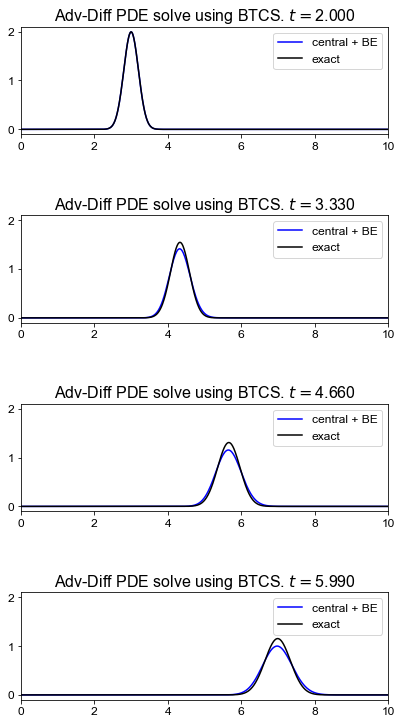

In [22]:
# solve using BTCS
C, x, t = adv_diff_Gaussian_3solver(dx, dt, t_start, t_end, U, kappa, 'BTCS')

# plotting figure
fig, axs = plt.subplots(4, 1, figsize=(6, 10))
axs = axs.reshape(-1)
fig.tight_layout(w_pad=4, h_pad=5)

xf = np.linspace(0, L, 1000)
for i, n in enumerate(np.linspace(0, C.shape[1]-1, 4, dtype=int)):
    axs[i].plot(x, C[:,n], 'b-', label='central + BE')
    axs[i].plot(xf, c_ex(U, kappa, x0, xf, t[n]), 'k-', label='exact')
    axs[i].legend(loc='best')
    axs[i].set_xlim(0.0, 10.0)
    axs[i].set_ylim(-0.1, 2.1)
    axs[i].set_title('Adv-Diff PDE solve using BTCS. $t=${0:.3f}'.format(t[n]), fontsize=16)


<div class="answerct">

### Crank-Nicolson
</div>

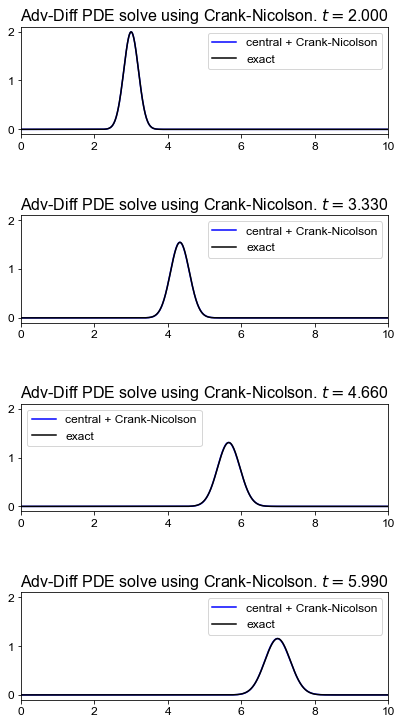

In [23]:
# solve using Crank-Nicolson 
C, x, t = adv_diff_Gaussian_3solver(dx, dt, t_start, t_end, U, kappa, 'CN')

# plotting figure
fig, axs = plt.subplots(4, 1, figsize=(6, 10))
axs = axs.reshape(-1)
fig.tight_layout(w_pad=4, h_pad=5)

xf = np.linspace(0, L, 1000)
for i, n in enumerate(np.linspace(0, C.shape[1]-1, 4, dtype=int)):
    axs[i].plot(x, C[:,n], 'b-', label='central + Crank-Nicolson')
    axs[i].plot(xf, c_ex(U, kappa, x0, xf, t[n]), 'k-', label='exact')
    axs[i].legend(loc='best')
    axs[i].set_xlim(0.0, 10.0)
    axs[i].set_ylim(-0.1, 2.1)
    axs[i].set_title('Adv-Diff PDE solve using Crank-Nicolson. $t=${0:.3f}'.format(t[n]), fontsize=16)


<div class="answerct">

From the plots above, we could see our code does work for all of the three methods, and they have different performance for the same problem.

The FTCS tends to overshoot (get higher value than the exact solution) while the BTCS tend to undershoot (
get lower value than the exact solution) at all time levels. <br>

The Crank-Nicolson apparently has more accuracy then the other two methods because the difference between approximations and the exact solution is hard to detect by eyes in the plots while the other two not.


</div>

<div class="answerct">

# Convergence rate analysis 

Next session we will extract the orders of accuracy for the three solvers with respect to the mesh spacing $\Delta x$ and the time step $\Delta t$.

We will start with a theoretical analysis.
</div>

<div class="answerty">

# (Theoretical answer) Global error of the three time update schemes

Before implementing codes, we will begin with a theoretical analysis for the convergence rate for the three methods.


</div>

<div class="answerty">

## Multi-dimensional taylor expansion

suppose our spatial meshes to be 
$$
\boldsymbol{x} = \begin{pmatrix}
x_0\\
x_1\\
\vdots\\
x_{N-1}
\end{pmatrix}
$$

then we denote our vectorized exact concentration as 
$$
\boldsymbol{c}(\boldsymbol{x}, t^n) = \begin{pmatrix}
c(x_0,t^n)\\
c(x_1,t^n)\\
\vdots\\
c(x_{N-1},t^n)
\end{pmatrix}
$$
and
$$
\frac{\partial \boldsymbol{c}(\boldsymbol{x}, t^n)}{\partial t}= \begin{pmatrix}
\frac{\partial c(x_0, t^n)}{\partial t}\\
\frac{\partial c(x_1, t^n)}{\partial t}\\
\vdots\\
\frac{\partial c(x_{N-1}, t^n)}{\partial t}
\end{pmatrix}
$$

Do taylor expansion of $c(x_i, t^n)$ w.r.t time $t$, and we have:
$$
c(x_i, t^{n+1}) = c(x_i, t^n + \Delta t) = c(x_i, t^n) + \Delta t \,\frac{\partial c(x_i, t^n)}{\partial t} + \frac{{\Delta t}^2}{2} \, \frac{\partial c^2(x_i, t^n)}{\partial t^2} + \mathcal{O}(\Delta t^3)
$$

Combining the expansion for each dimension, we'd have the vertorized form of expansion:
$$
\boldsymbol{c}(\boldsymbol{x}, t^{n+1}) = \boldsymbol{c}(\boldsymbol{x}, t^n) + \Delta t \,\frac{\partial \boldsymbol{c}(\boldsymbol{x}, t^n)}{\partial t} + \frac{{\Delta t}^2}{2} \, \frac{\partial \boldsymbol{c}^2(\boldsymbol{x}, t^n)}{\partial t^2} + \mathcal{O}(\Delta t^3) \cdots\cdots ①
$$

<br>


Also, choose increment as $-\Delta t$ for $\boldsymbol{c}(\boldsymbol{x}, t^{n+1})$, we have:
$$
\boldsymbol{c}(\boldsymbol{x}, t^{n}) = \boldsymbol{c}(\boldsymbol{x}, t^{n+1} - \Delta t) = \boldsymbol{c}(\boldsymbol{x}, t^{n+1}) - \Delta t \,\frac{\partial \boldsymbol{c}(\boldsymbol{x}, t^{n+1})}{\partial t} + \frac{{\Delta t}^2}{2} \, \frac{\partial \boldsymbol{c}^2(\boldsymbol{x}, t^{n+1})}{\partial t^2} + \mathcal{O}(\Delta t^3)
$$
so
$$
\boldsymbol{c}(\boldsymbol{x}, t^{n+1}) = \boldsymbol{c}(\boldsymbol{x}, t^{n}) + \Delta t \,\frac{\partial \boldsymbol{c}(\boldsymbol{x}, t^{n+1})}{\partial t} - \frac{{\Delta t}^2}{2} \, \frac{\partial \boldsymbol{c}^2(\boldsymbol{x}, t^{n+1})}{\partial t^2} + \mathcal{O}(\Delta t^3) \cdots\cdots ② 
$$

Taking derivative for the whole equation ① w.r.t time $t$, we got:
$$
\frac{\partial \boldsymbol{c}(\boldsymbol{x}, t^{n+1})}{\partial t} = \frac{\partial \boldsymbol{c}(\boldsymbol{x}, t^{n})}{\partial t} + \Delta t \, \frac{\partial \boldsymbol{c}^2(\boldsymbol{x}, t^n)}{\partial t^2} + \frac{{\Delta t}^2}{2} \, \frac{\partial \boldsymbol{c}^3(\boldsymbol{x}, t^n)}{\partial t^3} + \mathcal{O}(\Delta t^3) \cdots\cdots ③
$$

</div>

<div class="answerty">

## Defining local truncation error $\tau$

Recall we define the local truncation error (see lecture-6) for a scalar function to be:
<br>

$$
\tau_{n} := \frac{y(t_{n+1}) -  y(t_n)}{\Delta t} - f(t_n,y(t_n))
$$

where $f$ depends on the time-update scheme we use.

In this question, we could introduce a vectorized version: 
<br>

$$\tau_{n} := \frac{\boldsymbol{c}(t_{n+1}) -  \boldsymbol{c}(t_n)}{\Delta t} - f^n(\boldsymbol{t},\vec{\boldsymbol{c}(\boldsymbol{t})})$$

where $\boldsymbol{t} = (t_0, t_1 ,t_2, \cdots , t_{end})$ and $\vec{\boldsymbol{c(\boldsymbol{t})}}= (\boldsymbol{c}(t_0),\boldsymbol{c}(t_1),\boldsymbol{c}(t_2), \cdots , \boldsymbol{c}(t_{end}))$

so
<br>
\begin{align}
f_{FTCS}^n &= A \, \boldsymbol{c}(\boldsymbol{x}, t^{n})\\
f_{BTCS}^n &= A \, \boldsymbol{c}(\boldsymbol{x}, t^{n+1})\\
f_{CN(Crank-Nicolson)}^n &= \frac{1}{2}  A  \left(\boldsymbol{c}(\boldsymbol{x}, t^{n}) +\boldsymbol{c}(\boldsymbol{x}, t^{n+1})\right)\\
\end{align}


Thus we have:

\begin{align}
\tau_{FTCS}^n &= \frac{\boldsymbol{c}(\boldsymbol{x}, t^{n+1}) - \boldsymbol{c}(\boldsymbol{x}, t^{n})}{\Delta t} - A \, \boldsymbol{c}(\boldsymbol{x}, t^{n})\\
\tau_{BTCS}^n &= \frac{\boldsymbol{c}(\boldsymbol{x}, t^{n+1}) - \boldsymbol{c}(\boldsymbol{x}, t^{n})}{\Delta t} - A \, \boldsymbol{c}(\boldsymbol{x}, t^{n+1})\\
\tau_{CN(Crank-Nicolson)}^n &= \frac{\boldsymbol{c}(\boldsymbol{x}, t^{n+1}) - \boldsymbol{c}(\boldsymbol{x}, t^{n})}{\Delta t} - \frac{1}{2}  A  \left(\boldsymbol{c}(\boldsymbol{x}, t^{n}) +\boldsymbol{c}(\boldsymbol{x}, t^{n+1})\right)\\
\end{align}

Remember we defined $A$ be the discretised version of RHS of Advection-diffusion equation , recall the accuracy of central spatial scheme, we have:
<br>

$$
\begin{equation}\begin{split}
A \, \boldsymbol{c}(\boldsymbol{x}, t^{n})&= \left(-\frac{U}{\Delta x}\, D_{x} + \frac{\kappa}{{\Delta x}^2}\, D_{xx} \right)\, \boldsymbol{c}(\boldsymbol{x}, t^{n})\\
&= \begin{pmatrix}
-U \frac{\partial c}{\partial x_0} + \kappa \frac{\partial^2 c}{\partial {x_0}^2} + \mathcal{O}(\Delta x^2)\\
-U \frac{\partial c}{\partial x_1} + \kappa \frac{\partial^2 c}{\partial {x_1}^2} + \mathcal{O}(\Delta x^2)\\
\vdots\\
-U \frac{\partial c}{\partial x_{N-1}} + \kappa \frac{\partial^2 c}{\partial {x_{N-1}}^2} + \mathcal{O}(\Delta x^2)
\end{pmatrix}\\
\end{split}\end{equation}
$$

because ${\Delta x}^p$ is scalar factors, we can just extract out to get:
<br>

$$
A \, \boldsymbol{c}(\boldsymbol{x}, t^{n}) = \frac{\partial \boldsymbol{c}}{\partial t} + \mathcal{O}(\Delta x^2)
$$
<br>

Thus, the local truncation errors can be represented as:



\begin{equation}\begin{split}
\tau_{FTCS}^n &= \frac{\boldsymbol{c}(\boldsymbol{x}, t^{n+1}) - \boldsymbol{c}(\boldsymbol{x}, t^{n})}{\Delta t} - A \, \boldsymbol{c}(\boldsymbol{x}, t^{n})\\
&= - A \, \boldsymbol{c}(\boldsymbol{x}, t^{n}) + \frac{\partial \boldsymbol{c}(\boldsymbol{x}, t^n)}{\partial t} + \frac{\Delta t}{2} \, \frac{\partial \boldsymbol{c}^2(\boldsymbol{x}, t^n)}{\partial t^2} + \mathcal{O}(\Delta t^2) \cdots\cdots\text{using ①}\\
&= \mathcal{O}(\Delta x^2) + \frac{\Delta t}{2} \, \frac{\partial \boldsymbol{c}^2(\boldsymbol{x}, t^n)}{\partial t^2} + \mathcal{O}(\Delta t^2)\\
&= \mathcal{O}(\Delta x^2) + \mathcal{O}(\Delta t)\\
\\
\tau_{BTCS}^n &= \frac{\boldsymbol{c}(\boldsymbol{x}, t^{n+1}) - \boldsymbol{c}(\boldsymbol{x}, t^{n})}{\Delta t} - A \, \boldsymbol{c}(\boldsymbol{x}, t^{n+1})\\
&= - A \, \boldsymbol{c}(\boldsymbol{x}, t^{n+1}) + \frac{\partial \boldsymbol{c}(\boldsymbol{x}, t^{n+1})}{\partial t} - \frac{\Delta t}{2} \, \frac{\partial \boldsymbol{c}^2(\boldsymbol{x}, t^{n+1})}{\partial t^2} + \mathcal{O}(\Delta t^2) \cdots\cdots\text{using ②}\\
&= \mathcal{O}(\Delta x^2) - \frac{\Delta t}{2} \, \frac{\partial \boldsymbol{c}^2(\boldsymbol{x}, t^{n+1})}{\partial t^2} + \mathcal{O}(\Delta t^2)\\
&= \mathcal{O}(\Delta x^2) + \mathcal{O}(\Delta t)\\
\\
\tau_{CN}^n &= \frac{\boldsymbol{c}(\boldsymbol{x}, t^{n+1}) - \boldsymbol{c}(\boldsymbol{x}, t^{n})}{\Delta t} - \frac{1}{2}  A  \left(\boldsymbol{c}(\boldsymbol{x}, t^{n}) +\boldsymbol{c}(\boldsymbol{x}, t^{n+1})\right)\\
&= - \frac{1}{2}  A  \left(\boldsymbol{c}(\boldsymbol{x}, t^{n}) +\boldsymbol{c}(\boldsymbol{x}, t^{n+1})\right) + \frac{\partial \boldsymbol{c}(\boldsymbol{x}, t^n)}{\partial t} + \frac{\Delta t}{2} \, \frac{\partial \boldsymbol{c}^2(\boldsymbol{x}, t^n)}{\partial t^2} + \mathcal{O}(\Delta t^2) \cdots\cdots\text{using ①}\\
&= - \frac{1}{2}  A  \left(\boldsymbol{c}(\boldsymbol{x}, t^{n}) +\boldsymbol{c}(\boldsymbol{x}, t^{n+1})\right) + \frac{1}{2} \, \frac{\partial \boldsymbol{c}(\boldsymbol{x}, t^n)}{\partial t}\\
&+ \frac{1}{2} \left(\frac{\partial \boldsymbol{c}(\boldsymbol{x}, t^{n+1})}{\partial t} - \Delta t \, \frac{\partial \boldsymbol{c}^2(\boldsymbol{x}, t^n)}{\partial t^2} + \mathcal{O}(\Delta t^2)\right)\cdots\cdots\text{using ③}\\
&+ \frac{\Delta t}{2} \, \frac{\partial \boldsymbol{c}^2(\boldsymbol{x}, t^n)}{\partial t^2} + \mathcal{O}(\Delta t^2)\\
&= - \frac{1}{2}  A  \left(\boldsymbol{c}(\boldsymbol{x}, t^{n}) +\boldsymbol{c}(\boldsymbol{x}, t^{n+1})\right) + \frac{1}{2} \left(\frac{\partial \boldsymbol{c}(\boldsymbol{x}, t^n)}{\partial t} + \frac{\partial \boldsymbol{c}(\boldsymbol{x}, t^{n+1})}{\partial t}\right) + \mathcal{O}(\Delta t^2)\\
&= \mathcal{O}(\Delta x^2) + \mathcal{O}(\Delta t^2)
\end{split}\end{equation}


</div>

<div class="answerty">

## Defining global error $E$

In lecture 6, the the error for an scalar function $y(t)$ at an arbitrary time level is defined as:

$$E_n := {y}_{n} - {y}(t_{n}).$$

In this question, because our solution at each time step is actually a vector $\boldsymbol{c}(\boldsymbol{x}, t^n) = \left(c(x_0,t^n),c(x_1,t^n), \cdots c(x_{N-1},t^n)\right)$, thus our $E_n$ can be defined as:
<br>

$$
E_n := \frac{{\left\|\boldsymbol{c}^n - \boldsymbol{c}(\boldsymbol{x}, t^n)\right\|}_{2}}{N^{\frac{1}{2}}}
$$

where 

$$
{\left\|\boldsymbol{c}^n - \boldsymbol{c}(\boldsymbol{x}, t^n)\right\|}_{2} = \sum_{i=0}^N \left(c_i^n - c(x_i, t^n)\right)^2
$$

In the following, we denote $\boldsymbol{c}^n$ as $\boldsymbol{c}_n$ and $\boldsymbol{c}(\boldsymbol{x}, t^n)$ as ${\boldsymbol{c}}(t_{n})$.

For this problem, the end time is $t_{end}$, thus we would define $N_t$ is the overall time steps we need to reach $t_{end}$.

</div>

<div class="answerty">

## Exploring relationship between $E$ and $\tau$

With reference to ACSE-3 lecture 6, we introduce our definition of global error:

$$E := \max_{t_0\, \le \, t_n \, \le \, t_{end}}{\| {\boldsymbol{c}}_{n} - {\boldsymbol{c}}(t_{n})\|}_{2}$$

where the $L-2$ norm is defined above.

And the  error at an arbitrary time level is $$\boldsymbol{E_n} := {\boldsymbol{c}}_{n} - {\boldsymbol{c}}(t_{n})$$

Note we could also express $$E := \max_{0\, \le \, n \, \le \, N_t}{\| \boldsymbol{E_n} \|}_{2}$$ 

previously we have defined the local truncation error as $$\tau_{n} := \frac{\boldsymbol{c}(t_{n+1}) -  \boldsymbol{c}(t_n)}{\Delta t} - f^n(\boldsymbol{t},\vec{\boldsymbol{c}})$$,

where $\boldsymbol{t} = (t_0, t_1 ,t_2, \cdots , t_{end})$ and $\vec{\boldsymbol{c(\boldsymbol{t})}} = (\boldsymbol{c}(t_0),\boldsymbol{c}(t_1),\boldsymbol{c}(t_2), \cdots , \boldsymbol{c}(t_{end}))$

Thus we have 
<br>
$$
\boldsymbol{c}(t_{n+1}) = \boldsymbol{c}(t_n) + \Delta t \, f^n(\boldsymbol{t},\vec{\boldsymbol{c(\boldsymbol{t})}}) + \Delta t \, \tau_{n}
$$

and Note for the numerical approximations we have the relation independent of $\tau$:

<br>
$$
\boldsymbol{c}_{n+1} = \boldsymbol{c}_n + \Delta t \, f^n(\boldsymbol{t},\vec{\boldsymbol{c}})
$$
so
<br>

\begin{equation}\begin{split}
\boldsymbol{E_{n+1}} &= {\boldsymbol{c}}_{n+1} - {\boldsymbol{c}}(t_{n+1})\\
&= \boldsymbol{c}_n + \Delta t \, f^n(\boldsymbol{t},\vec{\boldsymbol{c}}) - \left(\boldsymbol{c}(t_n) + \Delta t \, f^n(\boldsymbol{t},\vec{\boldsymbol{c(\boldsymbol{t})}}) + \Delta t \, \tau_{n}\right)\\
&= \left(\boldsymbol{c}_n - \boldsymbol{c}(t_n)\right) + \Delta t \, \left(f^n(\boldsymbol{t},\vec{\boldsymbol{c}}) - f^n(\boldsymbol{t},\vec{\boldsymbol{c(\boldsymbol{t})}})\right) - \Delta t \, \tau_{n}\\
&= \boldsymbol{E_{n}} + \Delta t \, \left(f^n(\boldsymbol{t},\vec{\boldsymbol{c}}) - f^n(\boldsymbol{t},\vec{\boldsymbol{c(\boldsymbol{t})}})\right) - \Delta t \, \tau_{n}
\end{split}\end{equation}

Note for FTCS we have:
$$
f^n_{FTCS}(\boldsymbol{t},\vec{\boldsymbol{c}}) - f^n_{FTCS}(\boldsymbol{t},\vec{\boldsymbol{c(\boldsymbol{t})}}) = A \, \boldsymbol{c}_n - A \, \boldsymbol{c}(t_{n}) = A \, \boldsymbol{E_{n}}
$$

for BTCS we have:
$$
f^n_{BTCS}(\boldsymbol{t},\vec{\boldsymbol{c}}) - f^n_{BTCS}(\boldsymbol{t},\vec{\boldsymbol{c(\boldsymbol{t})}}) = A \, \boldsymbol{c}_{n+1} - A \, \boldsymbol{c}(t_{n+1}) = A \, \boldsymbol{E_{n+1}}
$$

for Crank-Nicolson we have:
$$
f^n_{CN}(\boldsymbol{t},\vec{\boldsymbol{c}}) - f^n_{CN}(\boldsymbol{t},\vec{\boldsymbol{c(\boldsymbol{t})}}) = \frac{1}{2} \, \left(A \, \boldsymbol{c}_n - A \, \boldsymbol{c}(t_{n})\right) + \frac{1}{2} \, \left(A \, \boldsymbol{c}_{n+1} - A \, \boldsymbol{c}(t_{n+1})\right) = \frac{1}{2} \, A \left(\boldsymbol{E_{n}} + \boldsymbol{E_{n+1}} \right)
$$

And the constant matrix $A$ actually has Lipschitz continuity for $\mathrm{R}^n$, we can check this.
<br>
    Recall, we defined the Vector induced matrix norms as:
    <br>
    
$$\|A\| := \max_{\boldsymbol{x}\ne 0}\frac{\|A\boldsymbol{x}\,\|}{\|\boldsymbol{x}\,\|} = \max_{\|\boldsymbol{x}\,\|=1}{\|A\boldsymbol{x}\,\|}$$

Now we suppose our norm is $d_2$ (Euclidean) metric in $\mathrm{R}^n$, and $A = -\frac{U}{\Delta x}\, D_{x} + \frac{\kappa}{{\Delta x}^2}\, D_{xx}$ independent of $n$.

we define for any non-zero vector $\boldsymbol{x} \in \mathrm{R}^n$
$$
L := \|A\|_2 = \max_{\boldsymbol{x}\ne 0}\frac{\|A\boldsymbol{x}\,\|_2}{\|\boldsymbol{x}\,\|_2}
$$

Thus for any $\boldsymbol{x},\boldsymbol{y} \in \mathrm{R}^n$, we have the following inequality:

\begin{equation}\begin{split}
\|A \, x - A \, y\|_2 &= \left\|A \, (x - y)\right\|_2\\
&= \left\|A \, \frac{(x - y)}{\|x - y\|_2}\right\|_2 \cdot \|x - y\|_2\\
&\le L \cdot \|x - y\|_2
\end{split}\end{equation}

Then we take some inspiration from LeVeque (FD book) section 6.3.3, we could get the bounds for $\|\boldsymbol{E}_{n+1}\|_2$ with each method.

For FTCS:
\begin{equation}\begin{split}
\|\boldsymbol{E_{n+1}}\|_2 &= \left\| \boldsymbol{E_{n}} + \Delta t \, A \, \boldsymbol{E_{n}} - \Delta t \, \tau_{n}\right\|_2\\
&\le \| \boldsymbol{E_{n}}\|_2 + \Delta t \, \|A \, \boldsymbol{E_{n}}\|_2 + \Delta t \, \|\tau_{n}\|_2\\
&\le (1 + L \Delta t) \, \| \boldsymbol{E_{n}}\|_2 + \Delta t \, \|\tau_{n}\|_2
\end{split}\end{equation}

By induction we have:
$$
\|\boldsymbol{E_{n}}\|_2 \le (1 + L \Delta t)^n \, \| \boldsymbol{E_{0}}\|_2 + \Delta t \sum_{i = 1}^n{(1 + L \Delta t)^{n - i}} \|\tau_{i-1}\|_2
$$

And note we start with a exact initial condition, with means $\boldsymbol{c}_0 = \boldsymbol{c(t_0)}$ and $\boldsymbol{E_{0}} = 0$, so
$$
\|\boldsymbol{E_{n}}\|_2 \le \Delta t \sum_{i = 1}^n{(1 + L \Delta t)^{n - i}} \|\tau_{i-1}\|_2
$$

Follows the same procedure in lecture-8, since $\,|1+L\Delta t| \le e^{\,|L|\, \Delta t}\,$ (which follows from $\,e^{\,|L|\, \Delta t} = 1 + |L|\, \Delta t + (|L|\, \Delta t)^2/2 + \ldots$), we know that

$$  |1 + \Delta t L|^{n  - i} \leq e^{\,(n-i)\, \Delta t\, |L|} \leq e^{\,n\,\Delta t\, L} = e^{\,L \, T}\;\;\;\;\;\text{and similarly} \;\;\;\;\;  
|1 + \Delta t L|^{n} \leq  e^{\,L \, T},
$$

where where $T = n\Delta t$ is the end point of our integration.

Thus, we have 

\begin{equation}\begin{split}
\|\boldsymbol{E_{n}}\|_2 &\le e^{\,L \, T} \, \Delta t \sum_{i = 1}^n{\|\tau_{i-1}\|_2}\\
&\le e^{\,L \, T} \, \left(n \Delta t \max_{1\le i\le n}\|\tau_{i-1}\|_2 \right)\\
&= e^{\,L \, T} \, \left(T \max_{1\le i\le n}\|\tau_{i-1}\|_2 \right)
\end{split}\end{equation}

And note that 

$$ \max_{1\le i\le n}{\|\tau_{i-1}\|_2}$$ 

has the same convergence rate $\mathcal{O}(\Delta x^p)$ and $\mathcal{O}(\Delta t^q)$ as any local truncation error $\tau_{n}$ because it's actually one of them.

Thus we conclude that the global error $E$ we defined for FTCS has the same convergence order of $\Delta x$ and $\Delta t$ as the local truncation error $\tau$.
   
<br>

For BTCS we have:
    
$$
\boldsymbol{E_{n}} =  \boldsymbol{E_{n-1}} + \Delta t \, A \, \boldsymbol{E_{n}} - \Delta t \, \tau_{n-1}
$$
    
Take norms on both sides would lead to:
    
<br>

\begin{equation}\begin{split}
\|\boldsymbol{E_{n}}\|_2 &= \left\| \boldsymbol{E_{n-1}} + \Delta t \, A \, \boldsymbol{E_{n}} - \Delta t \, \tau_{n-1}\right\|_2\\
&\le \| \boldsymbol{E_{n-1}}\|_2 + \Delta t \, \|A \, \boldsymbol{E_{n}}\|_2 + \Delta t \, \|\tau_{n-1}\|_2\\
&\le \frac{1}{(1 - L \Delta t)} \, \| \boldsymbol{E_{n-1}}\|_2 + \frac{\Delta t}{(1 - L \Delta t)} \, \|\tau_{n-1}\|_2 \text{   (we assume } L \Delta t \lt 1)\\
&= \frac{1}{(1 - L \Delta t)^n} \, \| \boldsymbol{E_{0}}\|_2 + \Delta t \sum_{i = 1}^n{\frac{1}{(1 - L \Delta t)^{n - i + 1}}} \|\tau_{i-1}\|_2\\
&= \Delta t \sum_{i = 1}^n{\frac{1}{(1 - L \Delta t)^{n - i + 1}}} \|\tau_{i-1}\|_2\\
&= \Delta t \sum_{i = 1}^n{\frac{1}{(1 - L \Delta t)^{i}}} \|\tau_{n-i+1}\|_2\\
\end{split}\end{equation}

if we set 
$$
S = \frac{1}{1 - L \, \Delta t}
$$

we have 
\begin{align}
S &= \frac{1}{1 - L \, \Delta t}\\
  &= \sum_{j = 0}^{\infty}{(L \, \Delta t)^j}\\
  &= 1 + L \, \sum_{j = 1}^{\infty}{\Delta t^j}
\end{align}
    
so
    
\begin{align}
S^n &= \left(1 + L \, \sum_{j = 1}^{\infty}{\Delta t^j}\right)^n\\
  &= 1 + n \cdot \left(L \, \sum_{j = 1}^{\infty}{\Delta t^j}\right) + \begin{pmatrix} 2 \\ n \end{pmatrix} \cdot \left(L \, \sum_{j = 1}^{\infty}{\Delta t^j}\right)^2 + \begin{pmatrix} 3 \\ n \end{pmatrix} \cdot \left(L \, \sum_{j = 1}^{\infty}{\Delta t^j}\right)^3 \cdots\\
  &= 1 + n \, L \Delta t + \mathcal{O}(\Delta t^2)
\end{align}   
    
Thus we have 
\begin{equation}\begin{split}
\|\boldsymbol{E_{n}}\|_2 &\le \Delta t \frac{S \left(1 - S^n\right)}{1 - S} \max_{1\le i\le n}\|\tau_{n-i+1}\|_2\\  
    &= \Delta t \frac{S \left(S^n - 1\right)}{S - 1} \max_{1\le i\le n}\|\tau_{i}\|_2\\  
    &= \Delta t \left(n \, L \Delta t + \mathcal{O}(\Delta t^2)\right) \, \frac{1}{1 - L \, \Delta t} \, \frac{1 - L \Delta t}{L \Delta t} \max_{1\le i\le n}\|\tau_{i}\|_2\\ 
    & = \left(T + \mathcal{O}(\Delta t)\right) \, \max_{1\le i\le n}\|\tau_{i}\|_2\\
\end{split}\end{equation}
    
Thus we conclude that the global error $E$ we defined for BTCS has the same convergence order of $\Delta x$ and $\Delta t$ as the local truncation error $\tau$.
    
<br>
Similarly, for Crank-Nicolson we have:
\begin{align}
\boldsymbol{E_{n}} &=  \boldsymbol{E_{n-1}} + \frac{1}{2} \Delta t \, A \, \left(\boldsymbol{E_{n}} + \boldsymbol{E_{n-1}}\right) - \Delta t \, \tau_{n-1}\\
\|\boldsymbol{E_{n}}\|_2 &\le  \|\boldsymbol{E_{n-1}}\|_2 + \frac{1}{2} \Delta t \, \left(\|A \boldsymbol{E_{n}}\|_2 + \|A \boldsymbol{E_{n-1}}\|_2\right) + \Delta t \, \|\tau_{n-1}\|_2\\
&\le \frac{1 + \frac{1}{2} L \Delta t}{1 - \frac{1}{2} L \Delta t} \, \|\boldsymbol{E_{n-1}}\|_2 + \frac{\Delta t}{1 - \frac{1}{2} L \Delta t} \, \tau_{n-1}\\
&= \left(\frac{1 + \frac{1}{2} L \Delta t}{1 - \frac{1}{2} L \Delta t}\right)^n \, \|\boldsymbol{E_{0}}\|_2 + \Delta t \, \sum_{i = 1}^n{\frac{1}{(1 - \frac{1}{2} L \Delta t)^{n - i + 1}}} \|\tau_{i-1}\|_2\\
&= \Delta t \, \sum_{i = 1}^n{\frac{1}{(1 - \frac{1}{2} L \Delta t)^{i}}} \|\tau_{n-i+1}\|_2\\
\end{align}
    
set
    
\begin{align}
S' &= \frac{1}{1 - \frac{1}{2} L \, \Delta t}\\
  &= \sum_{j = 0}^{\infty}{(\frac{1}{2} L \, \Delta t)^j}\\
  &= 1 + \frac{1}{2} L \, \sum_{j = 0}^{\infty}{\Delta t^j}
\end{align}

and
$$
{S'}^n = 1 + \frac{1}{2} n \, L \Delta t + \mathcal{O}(\Delta t^2)
$$
    
Thus we have

\begin{equation}\begin{split}
\|\boldsymbol{E_{n}}\|_2 &\le \Delta t \frac{S' \left(1 - {S'}^n\right)}{1 - S'} \max_{1\le i\le n}\|\tau_{n-i+1}\|_2\\  
    &= \Delta t \frac{S' \left({S'}^n - 1\right)}{S - 1} \max_{1\le i\le n}\|\tau_{i}\|_2\\  
    &= \Delta t \left(n \, \frac{1}{2} L \Delta t + \mathcal{O}(\Delta t^2)\right) \, \frac{1}{1 - \frac{1}{2} L \, \Delta t} \, \frac{1 - \frac{1}{2} L \Delta t}{\frac{1}{2} L \Delta t} \max_{1\le i\le n}\|\tau_{i}\|_2\\
    & = \left(T + \mathcal{O}(\Delta t)\right) \, \max_{1\le i\le n}\|\tau_{i}\|_2\\
\end{split}\end{equation}

Thus, we conlude FTCS, BTCS and Crank-Nicolson all have consistant convergence rate over $\Delta x$ and $\Delta t$ as their truncation errors, that is:
    
\begin{equation}\begin{split}
E_{FTCS} &= \mathcal{O}(\Delta x^2) + \mathcal{O}(\Delta t)\\
\\
E_{BTCS} &= \mathcal{O}(\Delta x^2) + \mathcal{O}(\Delta t)\\
\\
E_{Crank-Nicolson} &= \mathcal{O}(\Delta x^2) + \mathcal{O}(\Delta t^2)  
\end{split}\end{equation}
    
</div>

<div class="answerct">
    
## Implementing codes to verify the convergence rates

Next section we would make some log-log plots to straightly observe the convergence rate $\mathcal{O}(\Delta x^p)$ and $\mathcal{O}(\Delta t^q)$ for each time-stepping method. However, we should actually be careful of the parameters $U$ and $\kappa$ we choose. On the one hand we should choose appropriate pairs of $(U, \kappa)$ such that $\Delta t$ or $\Delta x$ dominate, on the other hand, we should not break the stability rules otherwise the error (at least for FTCS) would blow up. 
</div>

<div class="answerct">

## Stability conditions

<br>

Recall, we have three stability conditions for the FTCS scheme:

1. Cell Peclet number condition:

$$ PE_c:= \frac{U\Delta x}{\kappa} < 2. $$

2. CFL condition:

$$ \text{C} := \frac{U\Delta t}{\Delta x}<1.$$

3. r-parameter condition:

$$ r := \frac{\kappa\Delta t}{\Delta x^2} < \frac{1}{2}.$$


Note the first (Peclet number condition) draw from the central spatial scheme (which does not vary between time update schemes), but the second and the third condition are actually specific for the Forward Euler scheme. 
<br>

To start with, we compute the eigenvalues of matrix $A = -\frac{U}{\Delta x}\, D_{x} + \frac{\kappa}{{\Delta x}^2}\, D_{xx}$ (see ACSE-3 lecture 8), note we have the eigenvalues 
<br>

$$-4 \frac{\kappa}{\Delta x^2}\lt Re(\lambda)\lt 0, $$ 
and 
<br>

$$-\frac{U\Delta t}{\Delta x}<Im(\lambda) <\frac{U\Delta t}{\Delta x} $$

State the amplification factors for FE, BE and Crank-Nicolson:

\begin{align}
a_{FE} = 1 + \lambda \Delta t \\
\\
a_{BE} = \frac{1}{1 - \lambda \Delta t} \\
\\
a_{Crank-Nicolson} = \frac{1 + \frac{1}{2}  \lambda \Delta t}{1 - \frac{1}{2} \lambda \Delta t}
\end{align}

for $|a_{FE}| \lt 1$ we draw the CFL condition and r-parameter condition, but for $|a_{BE}|\lt 1$ and $|a_{Crank-Nicolson}| \lt 1$ neither of these two conditions are still needed, because they have "$A$" stability (and Backward Euler is L-stable as well) :

\begin{align}
\left|\frac{1}{1 - \lambda \Delta t}\right| \lt 1 \Rightarrow |1 - \lambda \Delta t| \gt 1 \Rightarrow (Im(\lambda) \Delta t)^2 + (Re(\lambda) \Delta t - 1)^2 \gt 1
\end{align}

where we have $Re(\lambda) \Delta t \lt 0 \Rightarrow (Re(\lambda) \Delta t - 1)^2 \gt 1$ for any $\Delta t \gt 0$, and $ (Im(\lambda) \Delta t)^2 \ge 0 $, thus the equation always holds.
<br>

Similarly, for $a_{Crank-Nicolson}$ we have:
<br>

\begin{align}
& \left|\frac{1 + \frac{1}{2}  \lambda \Delta t}{1 - \frac{1}{2} \lambda \Delta t}\right| \lt 1 \\
&  \,\,\,\,\,\,\,\,\,\,\,\, \Downarrow\\
& \frac{1}{4} (Im(\lambda) \Delta t)^2 + (1 + \frac{1}{2} Re(\lambda) \Delta t)^2 \lt \frac{1}{4} (Im(\lambda) \Delta t)^2 + (1 - \frac{1}{2} Re(\lambda) \Delta t)^2 \\
&  \,\,\,\,\,\,\,\,\,\,\,\,\Downarrow\\
& 2 Re(\lambda) \Delta t \lt 0
\end{align}

again, the equation always holds for $\Delta t \gt 0$, and considering $|Re(\lambda)| \lt \frac{4\kappa}{\Delta x^2}$, we know that Crank-Nicolson will be L-stable only when $\frac{\kappa}{\Delta x^2}$ is not very large.


</div>

<div class="answerct">

## log-log plots for $\Delta x$
    


</div>

In [24]:
# a new set of conditions

# we should set a relatively small dt
dt = 0.0001

# set other parameters appropriately
U = 1
kappa = 0.06
L = 10.
t_start = 2.
t_end = t_start + 4.
x0 = 1.0

# the range of dxs we use
dxs = np.arange(0.05, 0.1, 0.01)

In [25]:
# check three stability conditions

Pec = U * max(dxs) /kappa

C = U * dt / min(dxs)

r = kappa * dt / min(dxs)**2

stability = lambda x : np.choose(x, ['unstable', 'stable'])

print(r'Peclet number:', Pec, stability(Pec < 2))

print(r'CFL:', C, stability(C < 1))

print(r'r parameter:', r, stability(r < 1./2))

Peclet number: 1.5000000000000002 stable
CFL: 0.002 stable
r parameter: 0.0024 stable


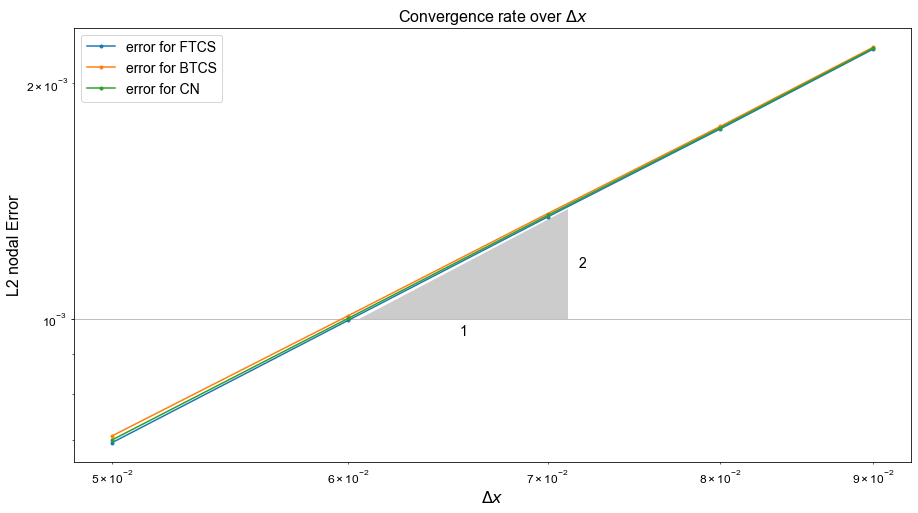

In [28]:
# set up figure
fig, axs = plt.subplots(1, 1, figsize=(15, 8))
   
method = ['FTCS', 'BTCS', 'CN']

# somewhere to store our errors for each time step size
error = np.empty((len(method),len(dxs)))

for (i, m) in enumerate(method):
    for j in range(len(dxs)): 
        C, x, t = adv_diff_Gaussian_3solver(dxs[j], dt, t_start, t_end, U, kappa, method[i])      
        error[i,j] = np.linalg.norm(c_ex(U, kappa, x0, x, t_end) - C[:,-1])/np.sqrt(len(x))
    
    axs.loglog(dxs, error[i,:], '.-', label=r'error for {0}'.format(method[i]))

    
axs.set_xlabel('$\Delta x$', fontsize=16)
axs.set_ylabel('L2 nodal Error', fontsize=16)
axs.set_title(r'Convergence rate over $\Delta x$', fontsize=16)
axs.grid(True)
axs.legend(loc='best', fontsize=14)
annotation.slope_marker((6.05e-2, 1e-3), (2, 1), ax=axs,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))  
        

<div class="answerct">

We see over a reasonable choice of $\Delta x$s, the error curve for the three time-stepping method almost coincide, with a same slope of 2. This proofs they not only all have a accuracy of $\mathcal{O}(\Delta x^2)$, but also indicates their effects are close to each other when $\Delta t$ is very small. 
    
</div>

<div class="answerct">

## log-log plots for $\Delta t$
    


</div>

In [29]:
# a new set of conditions

# we should set a relatively small dx
dx = 0.0001

# set other parameters appropriately
U = 1e-4
kappa = 1e-8
L = 0.01
t_start = 2
t_end = t_start + 30
x0 = 0.001

# the range of dxs we use
dts = np.arange(0.1, 0.15,  0.01)


In [30]:
# check three stability conditions

Pec = U * dx /kappa

C = U * max(dts) / dx

r = kappa * max(dts) / dx**2

stability = lambda x : np.choose(x, ['unstable', 'stable'])

print(r'Peclet number:', Pec, stability(Pec < 2))

print(r'CFL:', C, stability(C < 1))

print(r'r parameter:', r, stability(r < 1./2))

Peclet number: 1.0 stable
CFL: 0.13999999999999999 stable
r parameter: 0.13999999999999999 stable


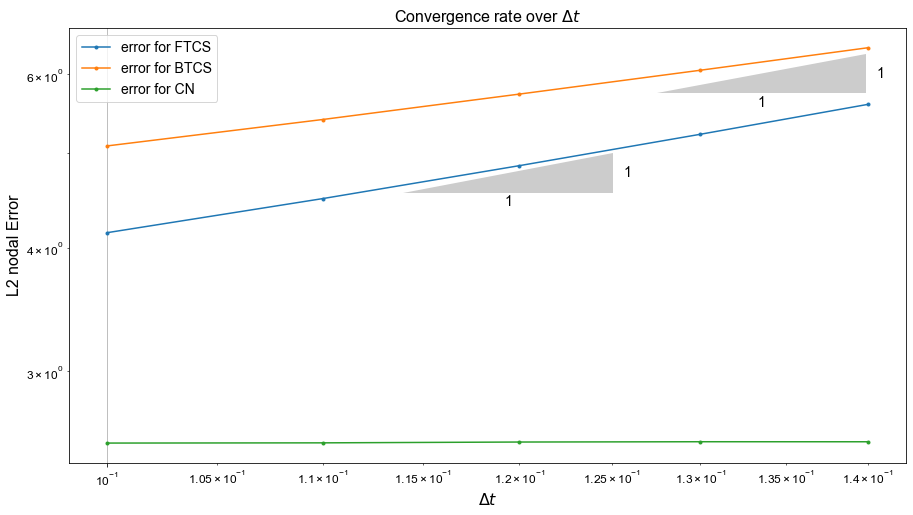

In [31]:
# set up figure
fig, axs = plt.subplots(1, 1, figsize=(15, 8))

dts = np.arange(0.1, 0.15,  0.01)
    
method = ['FTCS', 'BTCS', 'CN']

# somewhere to store our errors for each time step size
error = np.empty((len(method),len(dts)))

for (i, m) in enumerate(method):
    
    for j in range(len(dts)): 
        C, x, t = adv_diff_Gaussian_3solver(dx, dts[j], t_start, t_end, U, kappa, method[i])
        exact = c_ex(U, kappa, x0, x, t[-1])
   
        error[i,j] = np.linalg.norm(exact - C[:,-1])/np.sqrt(len(x))
    
    axs.loglog(dts, error[i,:], '.-', label=r'error for {0}'.format(method[i]))

    
axs.set_xlabel('$\Delta t$', fontsize=16)
axs.set_ylabel('L2 nodal Error', fontsize=16)
axs.set_title(r'Convergence rate over $\Delta t$', fontsize=16)
axs.grid(True)
axs.legend(loc='best', fontsize=14)
annotation.slope_marker((1.14e-1, 4.55e0), (1, 1), ax=axs,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

annotation.slope_marker((1.275e-1, 5.74e0), (1, 1), ax=axs,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))
        

<div class="answerct">

From the plot above, we could observe that: <br>
1) Crank-Nicolson has a lower global error than other two methods. <br>
2) FTCS and BTCS have a approximately convergence rate of 1 over $\Delta t$ in this region, thus the have an accuracy of $\mathcal{O}(\Delta t)$.<br>
3) What is interesting here is that the Crank-Nicolson seems not to show out an explicit convergence rate over $\Delta t$ in this region (remain flat). A answer for that may be the ratio of $\frac{\Delta t}{\Delta x}$ is not big enough, so that the constant factor $C$ of the leading order term $\Delta x^2$ still dominates, so let's try a larger $\Delta t$ down below. 
</div>

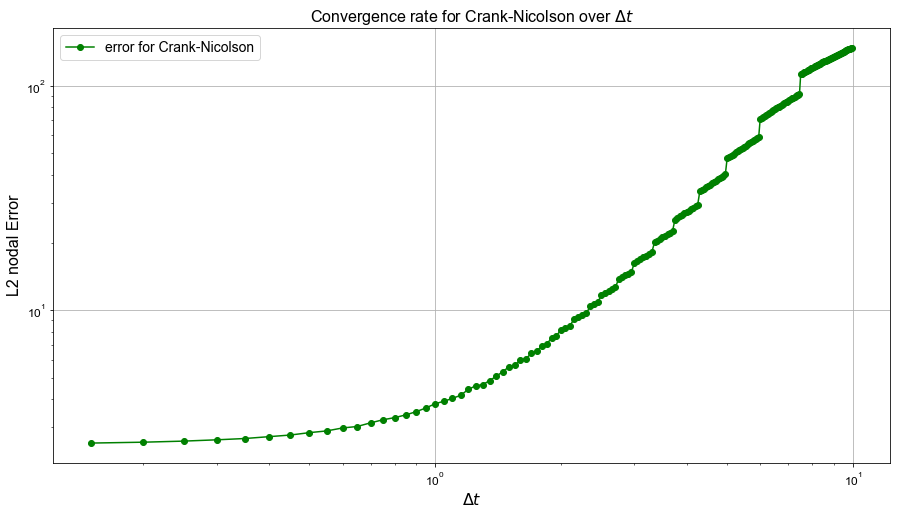

In [32]:
# set up figure
fig, axs = plt.subplots(1, 1, figsize=(15, 8))

# a larger span of dts, up to 10
dts = np.arange(0.15, 10.0,  0.05)
    
method = ['CN']

# somewhere to store our errors for each time step size
error = np.empty((len(method),len(dts)))

for (i, m) in enumerate(method):
    
    for j in range(len(dts)): 
        C, x, t = adv_diff_Gaussian_3solver(dx, dts[j], t_start, t_end, U, kappa, method[i])
        exact = c_ex(U, kappa, x0, x, t[-1])
   
        error[i,j] = np.linalg.norm(exact - C[:,-1])/np.sqrt(len(x))
    
    axs.loglog(dts, error[i,:], 'go-', label=r'error for Crank-Nicolson'.format(method[i]))

    
axs.set_xlabel('$\Delta t$', fontsize=16)
axs.set_ylabel('L2 nodal Error', fontsize=16)
axs.set_title(r'Convergence rate for Crank-Nicolson over $\Delta t$', fontsize=16)
axs.grid(True)
axs.legend(loc='best', fontsize=14)


<div class="answerct">

As we expected, the curve turn steeper as we increase $\Delta t$, let's cut out the region $[1, 10]$ and estimate its slope.

</div>

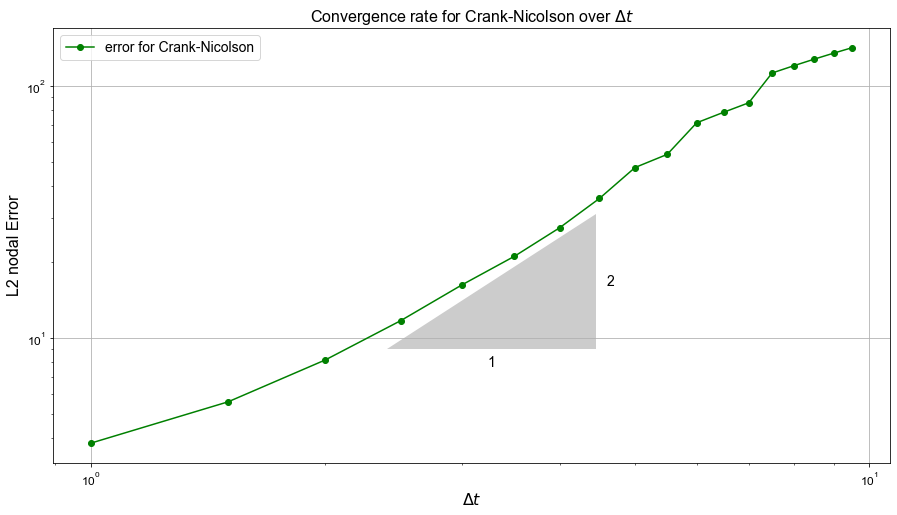

In [33]:
# set up figure
fig, axs = plt.subplots(1, 1, figsize=(15, 8))

dts = np.arange(1.0, 10.0,  0.5)
    
method = ['CN']

# somewhere to store our errors for each time step size
error = np.empty((len(method),len(dts)))

for (i, m) in enumerate(method):
    
    for j in range(len(dts)): 
        C, x, t = adv_diff_Gaussian_3solver(dx, dts[j], t_start, t_end, U, kappa, method[i])
        exact = c_ex(U, kappa, x0, x, t[-1])
   
        error[i,j] = np.linalg.norm(exact - C[:,-1])/np.sqrt(len(x))
    
    axs.loglog(dts, error[i,:], 'go-', label=r'error for Crank-Nicolson'.format(method[i]))

    
axs.set_xlabel('$\Delta t$', fontsize=16)
axs.set_ylabel('L2 nodal Error', fontsize=16)
axs.set_title(r'Convergence rate for Crank-Nicolson over $\Delta t$', fontsize=16)
axs.grid(True)
axs.legend(loc='best', fontsize=14)
annotation.slope_marker((2.4e0, 9e0), (2, 1), ax=axs,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

<div class="answerct">

Though not perfectly fit, but the slope is about 2, which matches our theoretical deduction that Crank-Nicolson has an accuracy of $\mathcal{O}(\Delta t^2)$.
</div>

# Solving the unsteady advection-diffusion equation using the finite element method


<br>


In Lecture 12 we wrote a series of functions to implement a local assembly based finite element solver for the unsteady diffusion equation.

<br>


Update this solver such that it solves the unsteady advection-diffusion equation.

<br>


In a similar manner to the previous question, consider a problem with an analytical solution to verify your implementation.

[A similar ***hint*** to the previous question applies here].


<br>

Comment on the performance of your finite element solver in comparison to your finite difference solver from the previous question.


<br>


[***Hint:***  To complete this question you will need to start from the code given in the lecture, and update it to compute and add into your time-stepping discretisation the matrix that corresponds to the additional advection term in the equation.]


<div class="answertl">

## Answers for question 3  [$\star$]
<br>
     
</div>

<div class="answerct">

## Periodic 1D Mesh generation

To be consistant with what we did for finite difference method in problem 2, we would generate a periodic mesh in 1D, the trick here is just specify the number of elements (as well as the size if non-uniform) we need, generate a mesh for it, and then throw away the last one.
</div>

In [34]:
# altered from codes in lecture-12
def generate_periodic_mesh(Lx, N_elements_CG, mesh_option=0):
    """ Function to generate a periodic mesh given the domain size Lx
    (we assume the left hand entry is always at zero).
    
    Use N_elements_CG number of element.
    
    mesh_option==0 corresponds to a uniform mesh, abandon the last one.
    
    Returns: the node locations x_node and the mesh spacing dx
    """
    if(mesh_option==0):
        x_nodes = np.linspace(0, Lx ,N_elements_CG+1)
        dx = np.diff(x_nodes)
        x_nodes = np.delete(x_nodes, -1)
    else:
        raise Exception('mesh_option != 0 not implemented yet')
    # given the mesh compute an array of element sizes
    return x_nodes, dx

print('x_nodes=', generate_periodic_mesh(10, 5)[0])
print('dx=', generate_periodic_mesh(10, 5)[1])

x_nodes= [0. 2. 4. 6. 8.]
dx= [2. 2. 2. 2. 2.]


<div class="answerct">

## Connectivity matrix for the periodic mesh

Because it's a 1D problem, the only change here is to specify the second local node of the last element is the first global node. (the right connects the left)

</div>

In [35]:
# altered from codes in lecture-12
def connectivity_periodic(N_loc, N_elements_CG):
    """ Generate the connectivity matrix of dimension N_loc * N_elements_CG.
    
    Row corresponds to the local node number, column to the element number,
    the entry of the matrix is then a global node number.
    
    Returns: the connectivity matrix (periodic)
    """
    connectivity_matrix = np.zeros((N_loc, N_elements_CG), dtype=int)
    if(N_loc==2):
        for element in range (N_elements_CG - 1):
            connectivity_matrix[0, element] = element
            connectivity_matrix[1, element] = element + 1
            
        connectivity_matrix[0, N_elements_CG - 1] = N_elements_CG - 1
        connectivity_matrix[1, N_elements_CG - 1] = 0      
    else:
        raise Exception('Only linear element (N_loc=2) implemented.')
    return connectivity_matrix

pprint(connectivity_periodic(2, 10))

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]])


<div class="answerct">

## Wrapping up values for linear basis functions (their derivatives) with transformation to the reference element

In this question, we simply consider implementing the linear basis functions (also called hat functions), which has the form

$$
\phi_i(x) = 
\begin{cases}
\frac{x - x_{i-1}}{\Delta x_{i-1}}, &\text{if}\;\;\; x\in e_{i-1}\equiv[x_{i-1},x_{i}] \\[5pt]
\frac{x_{i+1} - x}{\Delta x_{i}}, &\text{if}\;\;\; x\in e_{i}\equiv[x_{i},x_{i+1}] \\[5pt]
0, & \text{otherwise} \\
\end{cases}
$$

and its derivative

$$
\phi_i'(x) = 
\begin{cases}
\frac{1}{\Delta x_{i-1}}, &\text{if}\;\;\; x\in e_{i-1}\equiv[x_{i-1},x_{i}] \\[5pt]
-\frac{1}{\Delta x_{i}}, &\text{if}\;\;\; x\in e_{i}\equiv[x_{i},x_{i+1}] \\[5pt]
0, & \text{otherwise} \\
\end{cases}
$$

To evaluate integrals, we could consider the schematic below.

<img src="refelement.svg" style="width: 800px">

We can define the linear mapping between the physical $\,x\in[x_L, x_R]\,$ and the reference element $\,\xi\in[-1,1]\,$ via

\begin{align*} 
x &= \frac{1}{2}\left(x_L+x_R\right) + \frac{1}{2}\left(x_R - x_L\right)\xi \\[5pt]
&= \frac{1}{2}\left(x_L+x_R\right) + \frac{1}{2}\Delta x\,\xi.
\end{align*}

where $\,\Delta x = x_R-x_L\,$ is the *local* mesh size.

Integrals over a physical element $\,e_i\,$ can then be computed as in the following example of a mass matrix entry:

\begin{align*}
\int_{e_i} \,f_{i}(x)\, dx 
&\equiv 
\int_{x_i}^{x_{i+1}} \,f_{i}(x)\, dx \\[10pt]
& = 
\int_{-1}^{1} \,\,f_{i}(\xi)\, |J| \, d\xi\\[10pt]
& \equiv 
\int_{e_{\text{ref}}} \,\,f_{i}(\xi) \, |J| \, d\xi
\end{align*}

where $|J|$ is the Jacobian determinant which we always need to remember to include when we perform a [*change of variables in an integral*](http://mathworld.wolfram.com/ChangeofVariablesTheorem.html).

In our case

$$ J = \frac{dx}{d\xi} = \frac{1}{2}\Delta x,$$

where $\Delta x$ is understood to be the local element size.

We choose the integrand $f_{i}(x)$ to be $\phi_i \, \phi_{i+1}$, $\phi_i' \, \phi_{i+1}$ or $\phi_i' \, \phi_{i+1}'$, depending the matrix we need to compute (M, D or K).

Now we need to know how the basis functions $\phi_i$ and $\phi_{i+1}$ $\phi_i'$ and $\phi_{i+1}'$ are defined in terms of the variable $\xi$, i.e. what they look like in the reference element. But this is simple as we know for linear basis functions they are 1 at one node, 0 at the other, and linear in between. The two basis functions (and their derivatives) on the reference element are therefore in the linear case (by simple computation)

$$ \phi_0(\xi) := \frac{1}{2}( 1 - \xi),\;\;\;\;\;\;\;\; \phi_1(\xi) := \frac{1}{2}( 1 + \xi), $$

<br>

$$ \phi_0'(\xi) := \frac{d\left(\phi_0(\xi)\right)}{d\xi} \cdot \frac{d\xi}{dx} = -\frac{1}{2} \cdot \frac{2}{\Delta x}  = -\frac{1}{\Delta x},\;\;\;\;\;\;\;\; \phi_1'(\xi) := \frac{1}{2} \cdot \frac{2}{\Delta x} = \frac{1}{\Delta x}, $$

where the subscripts 0 and 1 refer to the *local* node number on the element.

We define in our code
<br>
<br>
`phi[0,0]`, `phi[0,1]` represents $\phi_0(0), \phi_0(1)$ for 2 point quadrature rule.
<br>
`phi[0,0]`, `phi[0,1]`, `phi[0,2]` represents $\phi_0(0), \phi_0(\frac{1}{2}), \phi_0(1)$ for 3 point quadrature rule.
<br>
Similar for derivatives.

Thus we would have the values in the code following:
</div>

In [36]:
# borrowed codes from lecture-12
def shape(N_loc, N_gi):
    """ Define reference shape functions - 
    their values at N_gi quadrature points.
    
    Only implemented for N_loc = 2, i.e. 
    two nodes per element - linear basis functions.
    """ 
    assert(N_loc==2)
    phi = np.zeros( (N_loc, N_gi) )
    if(N_gi==2):
        phi[0,0] = 1.0 
        phi[0,1] = 0.0 
        phi[1,0] = 0.0 
        phi[1,1] = 1.0
    elif(N_gi==3):
        phi[0,0] = 1.0 
        phi[0,1] = 0.5 
        phi[0,2] = 0.0 
        phi[1,0] = 0.0 
        phi[1,1] = 0.5 
        phi[1,2] = 1.0        
    else:
        raise Exception('N_gi value not implemented.')
    return phi

def shape_derivatives(element, dx, N_loc, N_gi):
    """ Define derivatives of shape functions - their values at N_gi quadrature points
    over the reference element.
    
    Only implemented for N_loc = 2, i.e. two nodes per element - 
    linear basis functions.
    """   
    assert(N_loc==2)
    phi_x = np.zeros( (N_loc, N_gi) )
    # the derivatives of our linear basis functions over the reference element
    if(N_gi==2):
        phi_x[0,0] = -1. / 2.
        phi_x[0,1] =  phi_x[0,0] 
        phi_x[1,0] = -phi_x[0,0]  
        phi_x[1,1] =  phi_x[1,0]
    elif(N_gi==3):
        phi_x[0,0] = -1. / 2.
        phi_x[0,1] = phi_x[0,0] 
        phi_x[0,2] = phi_x[0,0] 
        phi_x[1,0] = -phi_x[0,0] 
        phi_x[1,1] = phi_x[1,0] 
        phi_x[1,2] = phi_x[1,0]            
    else:
        raise Exception('N_gi value not implemented.')
    # Jacobian contribution as seen/explained above due to the use of the chain rule
    phi_x = phi_x * (2. / dx[element]) 
    return phi_x

<div class="answerct">

## Quadrature weights
Next we would just define a weight function to implement 2-point (trapezium) and 3-point (Simpson) quadrature rule for integral.

According our knowledge of the accuracy of the quadrature rules, because the power of our integrand in matrices is less or equal then 2 (because the order of $\phi_i(x)$ is 1), thus a 3-point (Simpson) rule will always give us an exact value for our matrix entries. Thus, we would choose 3-point (Simpson) as our default quadrature rule. 

</div>

In [37]:
# borrowed codes from lecture-12
def quadrature(N_gi):
    """ Define quadrature rule on N_gi quadrature points.
    """    
    weight = np.zeros(N_gi)
    if(N_gi==2):  # Trapezoidal rule in 1D
        weight[0] = 0.5 
        weight[1] = 0.5
    elif(N_gi==3): # Simpson's rule in 1D
        weight[0] = 1. / 6. 
        weight[1] = 2. / 3. 
        weight[2] = 1. / 6.
    else:
        raise Exception('N_gi value not implemented.')
    return weight

<div class="answerct">

## Adding the advection term and specify the difference 

Consider time-dependent advection-diffusion written in the form 

$$\frac{\partial c}{\partial t} + U\frac{\partial c}{\partial x} = \kappa\frac{\partial^2 c}{\partial x^2}, $$

and assuming for simplicity that the advection volocity $U$ and diffusivity $\kappa$ are constants.

The weak/variational form of this problem can be written as (ignoring boundary terms)

$$ \int_I \,\frac{\partial c}{\partial t}\,v\,dx + \kappa\int_I \,c'\,v'\,dx + U\int_I \,c'\,v\,dx= 0, \;\;\;\;\forall \;\; v\in V.$$

Substituting in our approximate solution function 

$$c_h(x,t) := \sum_{j=0}^{n} c_j(t)\,\phi_j(x),$$

and restricting the test functions to the appropriate finite-dimensional space ($v\in V_h$ with a basis given by $\phi_i$) yields the discrete system

\begin{align*} 
\sum_{j=0}^{n} \,\frac{\partial c_j}{\partial t}\, \int_I \phi_j\, \phi_i \,dx  +  \sum_{j=0}^{n}c_j\, \left(\kappa  \int_I \phi_j'\, \phi_i' \,dx + U \int_I \phi_j'\, \phi_i \,dx \right) &= 0\;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n \\[10pt]
\iff
\sum_{j=0}^{n} \,\frac{d c_j}{d t} M_{ij} + \kappa\sum_{j=0}^{n} c_j\, K_{ij} + U\sum_{j=0}^{n} c_j\, D_{ij} &= 0, \;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n.
\end{align*}

Or in matrix form
$$
M\, \frac{d \boldsymbol{c}}{d t} + \boldsymbol{c} \left(\kappa\, K + U\, D\right)= \boldsymbol{0},
$$

where $K$ is the discretisation matrix for diffusion we saw in lecture-11, $M$ is the mass matrix, and the matrix $D$ is discretisation matrix for advection, given by 

$$
D_{ij} := \int_I \phi_i'\, \phi_j \,dx
$$

To discretise in time we simply replace the time derivative with a finite difference approximation, we implement the "theta" method (to give us the flexibility to choose forward Euler, backward Euler or Crank-Nicolson), then we have:

$$
M \,\frac{\boldsymbol{c}^{n+1} - \boldsymbol{c}^{n}}{\Delta t} + \left( \kappa\, K + U \, D \right)\,\left(\theta \, \boldsymbol{c}^{n+1} + (1-\theta)\boldsymbol{c}^{n}\right) = \boldsymbol{0},
$$

which can be rearranged to 

$$ \left[ M + \theta\,\Delta t \,(\kappa\, K + U \, D) \right]  \boldsymbol{c}^{n+1} = \left[ M - (1-\theta)\, \Delta t \,(\kappa\, K + U \, D) \right] \boldsymbol{c}^{n}.$$


</div>

<div class="answerct">

## Evaluating the integral by local assembly over elements

Note the equation we have for this problem is:
\begin{align*} 
\sum_{j=0}^{n} \,\frac{\partial c_j}{\partial t}\, \int_I \phi_j\, \phi_i \,dx  +  \sum_{j=0}^{n}c_j\, \left(\kappa  \int_I \phi_j'\, \phi_i' \,dx + U \int_I \phi_j'\, \phi_i \,dx \right) &= 0\;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n \\[10pt]
\end{align*}

Note $I$ is the whole region we are focused, if we split the region $I$ into finite elements we defined, $I = \displaystyle\bigcup_{i = 0}^{n-1}{e_i}$ with $e_i \cap e_j = \phi$ if $i \ne j$. Thus, for 1-D spatial mesh, we have $e_i = [x_i,x_{i+1}]$ is the $i$-th element.

The equation can be split as:

\begin{align*} 
\sum_{j=0}^{n} \,\frac{\partial c_j}{\partial t}\, \sum_{k=0}^{n-1} \int_{e_k} \phi_j\, \phi_i \,dx  +  \sum_{j=0}^{n}c_j\, \left(\kappa  \sum_{k=0}^{n-1} \int_{e_k} \phi_j'\, \phi_i' \,dx + U \sum_{k=0}^{n-1} \int_{e_k} \phi_j'\, \phi_i \,dx \right) &= 0\;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n \\
\iff
\sum_{k=0}^{n-1} \left[\sum_{j=0}^{n} \,\frac{\partial c_j}{\partial t}\, \int_{e_k} \phi_j\, \phi_i \,dx  + \sum_{j=0}^{n}c_j\, \left(\kappa \int_{e_k} \phi_j'\, \phi_i' \,dx + U \int_{e_k} \phi_j'\, \phi_i \,dx \right)\right] &= 0\;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n \\
\end{align*}

Thus we can denote the integral terms in the square bracket of the RHS as $M_{e_k}$, $K_{e_k}$ and $D_{e_k}$, and the equation (matrix form) would become:

$$
\sum_{k=0}^{n-1} \left[ M_{e_k}\, \frac{d \boldsymbol{c}}{d t} + \boldsymbol{c} \left(\kappa\, K_{e_k} + U\, D_{e_k}\right)\right]= \boldsymbol{0},
$$

where the $(i, j)$ th term of $M_{e_k}$ is 

$$
\int_{e_k} \phi_i\, \phi_j \,dx
$$

Thus, we can use information from the connectivity matrix to compute $M_{e_k}$, $K_{e_k}$ and $D_{e_k}$. In this 1-D problem the integrand would be non-zero if and only if $\phi_i$ ($\phi_i'$), $\phi_j$ ($\phi_j'$) are both non-zero over $e_k$ <br>
$\iff$ $i$ in $e_k$ and $j$ is connected with $i$ (be one of $e_k$'s local nodes).

Thus, we could fixed some $i$ from the local nodes of $e_k$, loop over the local nodes again as $j$, this would give us the $(i, j)$ th term of $M_{e_k}$.

From this idea we would have the code following:

[***Note:*** by performing the coordinate transformation $x = \frac{1}{2}\left(x_L+x_R\right) + \frac{1}{2}\Delta x\,\xi$, we have
<br>
$$ J = \frac{dx}{d\xi} = \frac{1}{2}\Delta x,$$

Thus we always need to multiply a factor of $\frac{1}{2}\Delta x$ when we evaluate integrals.]

</div>

In [38]:
# altered from function in lectrue-12
# adding some codes to compute local assembly discretisation advection matrix D.
def assembly_local(M, K, D, element, connectivity_matrix, N_loc, N_gi, weight, phi, phi_x, dx):
    """ Perform local assembly by performing a double loop over the local node numbers 
    (in order to form products of local basis functions), 
    computing the required integrals, and adding contributions to the correct 
    locations of the global discretisation matrices.
    
    As we are solving the Diffusion problem we know we need the mass matrix M, the 
    diffusion discretisation matrix K, as well as the advection discretisation matrix D.
    
    The current versions of the full M, K, D matrices are passed into this function
    and the local contribitions added in to them, so we don't need to return anything. 
    Alternatively we could return the local contributions and add them in in the 
    calling function.
    """
    for i_loc in range(N_loc):
        i_global = connectivity_matrix[i_loc, element]
        for j_loc in range(N_loc):
            j_global = connectivity_matrix[j_loc, element]
            # perform the quadrature - over one element with one "quadrature interval"
            # "weight" is the quadrature weight, e.g. 1/6, 4/6, 1/6 for Simpson's rule
            # and we need to remember to include the Jacobian determinant
            phi_phi = 0.
            phix_phix = 0.
            phi_phix = 0.
            for gi in range(N_gi):
                phi_phi += weight[gi] * phi[i_loc, gi] * phi[j_loc, gi] * 0.5*dx[element] 
                # dx/2 in the line above is the Jacobian determinant 
                phix_phix += weight[gi] * phi_x[i_loc, gi] * phi_x[j_loc, gi] * 0.5*dx[element]
                
                phi_phix += weight[gi] * phi[i_loc, gi] * phi_x[j_loc, gi] * 0.5*dx[element]
             
            # adding up contributions
            M[i_global, j_global] += phi_phi 
            K[i_global, j_global] += phix_phix
            D[i_global, j_global] += phi_phix

<div class="answerct">

## Global assembly

As explained above, the $(i, j)$ th term of the global matrix $M$ can be computed by adding the $M_{e_k}$s up, that is:<br>

$$
M[i, j] = \sum_{k=0}^{n-1} M_{e_k}[i, j]
$$

So we can loop over elements, and add up their contributions, same for matrix $K$ and $D$.

</div>

In [39]:
# borrowed from codes in lecture-12
# adding some codes to global assemble discretisation advection matrix D.
def assembly_global(M, K, D, N_elements_CG, connectivity_matrix, N_loc, N_gi, weight, phi, dx):
    """ Perform global assembly by looping over elements.
    """
    # loop over all elements
    for element in range(N_elements_CG):
        # compute the derivatives of the basis function on this element
        phi_x = shape_derivatives(element, dx, N_loc, N_gi)
        # perform local assembly and update the M and K matrices
        assembly_local(M, K, D, element, connectivity_matrix, N_loc, N_gi, weight, phi, phi_x, dx)

<div class="answerct">

## Coding up the finite element advection-diffision solver
In the following cell,  we will write our finite element PDE solver, adapting from codes in ACSE-3 lecture 12.

```Python
def FEM_advection_diff(dx, dt, t_start, t_end, U, kappa, scheme):
```

<br>

taking 9 arguments:

`U` : advection velocity, a scalar <br/>
`kappa`: diffusivity, a scalar <br/>
`N_nodes_CG` : number of nodes for our spatial mesh <br/>
`dt` : the time step size <br/>
`t_start` : the start time<br/>
```t_end``` : the end time<br/>
`theta`: decides the time step scheme we use, 0 for 'FTCS', 1 for 'BTCS' and 0.5 for 'Crank-Nicolson'.<br/>
`N_loc`: number of local nodes for each element, for 1-D spatial space it's 2 by default.<br/>
`N_gi`: quadrature points for integral

The procedure for our solver:<br>
1) generate a 1-D uniform periodic spatial mesh according to input 'N_nodes_CG'.<br>
2) generate a connectivity matrix.<br>
3) do global assembly for discretisation matrices $M$, $K$ and $D$.<br>
4) combine them into our final matrix system, using the time-stepping method according to $\theta$.
   
</div>

In [40]:
# alter codes in lecture-12
def FEM_advection_diff(U, kappa, N_nodes_CG, dt, t_start, t_end, theta, N_loc = 2, N_gi = 3):
    """ The finite element solver for the advection-diffusion equation, with periodic boundary condition.
    
    Uses:
    U: advection volocity   
    kappa: diffusivity   
    N_nodes_CG: number of nodes.
    dt: time step size
    t_start: start time
    t_end: end time
    theta: the parameter for our time stepping method 
    (0 is forward Euler, 1 is implicit Euler, 0.5 is Crank-Nicolson)
    N_loc: the number of local nodes for each element
    N_gi: quadrature points for integral

    Returns: 
    x_nodes: the node locations, 1-d array.
    dts: time steps, 1-d array
    uu: numerical solution, 2-d array, row for spatical location, column for time stage.
    r: r parameter 
    
    """
    # Note in periodic boundary condition, we have the number of elements equals to the number of nodes,
    # because the mesh is topologically a circle, connecting two end points. 
    N_elements_CG = N_nodes_CG

    # generate mesh, here we just generate a equally spaced periodic mesh
    x_nodes, dx = generate_periodic_mesh(L, N_elements_CG)
    
    # generate connectivity_matrix according to periodic boundary condition.
    connectivity_matrix = connectivity_periodic(N_loc, N_elements_CG)
    
    # an array for time steps.
    ts = np.arange(t_start, t_end, dt)
    
    # record the size of the "r parameter"
    r = kappa*dt/(np.min(dx)**2)

    # set-up things we need for our discretisation
    # the basis functions defined on our reference element
    phi = shape(N_loc, N_gi)

    # quadrature weights
    weight = quadrature(N_gi)

    # allocate space to store our discretisation matrices
    M = np.zeros((N_nodes_CG, N_nodes_CG))
    K = np.zeros_like(M)
    D = np.zeros_like(K)

    # assemble the individual discretisation matrices
    assembly_global(M, K, D, N_elements_CG, connectivity_matrix, N_loc, N_gi, weight, phi, dx)
    

    # and combine them into our final matrix system
    A = M + dt*theta*(kappa*K + U*D)
    RHS_matrix = M - dt*(1-theta)*(kappa*K + U*D)
    
    # set an initial condition
    u_ic = c_ex(U, kappa, x0, x_nodes, t_start)
    
    # a 2d-array to store our numerical solutions at all time-steps as well as spatial meshes.
    uu = np.zeros((len(x_nodes), len(ts)))
    
    # initialize our solution, c_ex borrowed from question 2.
    u_ic = c_ex(U, kappa, x0, x_nodes, t_start)
    uu[:, 0] = np.copy(u_ic).T
    
    # perform time iteration, becuse we assume periodicity,
    # no need to apply boundary conditons like lecture-12 do.
    for it in range(len(ts)-1):
        cu = np.copy(uu[:, it])
        b = RHS_matrix @ cu
        uu[:, it+1] = sl.solve(A, b)

    return x_nodes, ts, uu, r


<div class="answerct">

## Simple test and verification

Next, we will test our finite element solver with different $\theta$ parameters, using exactly the same test case/verification solution presented in question 2 we have done.

</div>

In [41]:
# defining the conditions for the problem, exactly the same as the test case in question 2.
U = 1
kappa = 1./100.
N = 500
L = 10.
dx = L / N
dt = 0.01
t_start = 2.
t_end = t_start + 4.
x0 = 1.0

<div class="answerct">

## FTCS
</div>

number of Nodes: 500
r parameter: 0.25000000000001066
RMS nodal error:  1.1963409195554004e+103


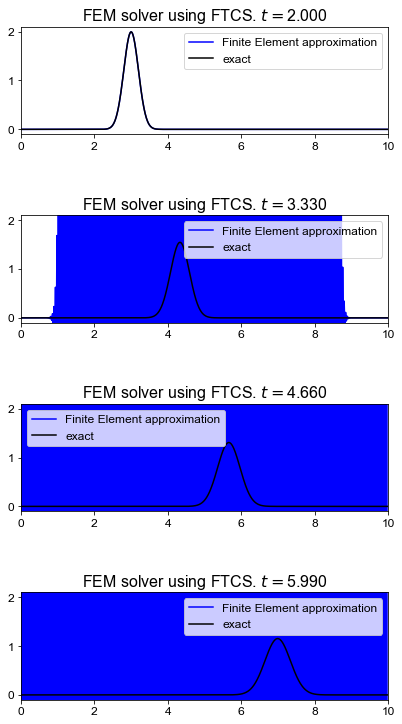

In [42]:
# plotting figure
fig, axs = plt.subplots(4, 1, figsize=(6, 10))
axs = axs.reshape(-1)
fig.tight_layout(w_pad=4, h_pad=5)

x_nodes, ts, uu, r = FEM_advection_diff(U, kappa, N, dt, t_start, t_end, 0, N_loc = 2, N_gi = 3)

xf = np.linspace(0, L, 1000)
for i, n in enumerate(np.linspace(0, uu.shape[1]-1, 4, dtype=int)):
    axs[i].plot(x_nodes, uu[:,n], 'b-', label='Finite Element approximation')
    # implement the analytical solution c_ex from question 2.
    axs[i].plot(xf, c_ex(U, kappa, x0, xf, ts[n]), 'k-', label='exact')
    axs[i].legend(loc='best')
    axs[i].set_xlim(0.0, 10.0)
    axs[i].set_ylim(-0.1, 2.1)
    axs[i].set_title('FEM solver using FTCS. $t=${0:.3f}'.format(ts[n]), fontsize=16)

print('number of Nodes:', N)
print('r parameter:', r)
print('RMS nodal error: ', np.linalg.norm(c_ex(U, kappa, x0, x_nodes, ts[-1]) - uu[:,-1])/np.sqrt(len(x_nodes)))

<div class="answerct">
 
We surprisingly find that the FTCS method breaks in stability even when the $r$ parameter is less then $0.5$. Let's try a smaller $\Delta x$ to see if it fixes the instability. 
</div>

In [43]:
N = int( N / 2.)

number of Nodes: 250
r parameter: 0.06250000000000266
RMS nodal error:  0.05217296986479207


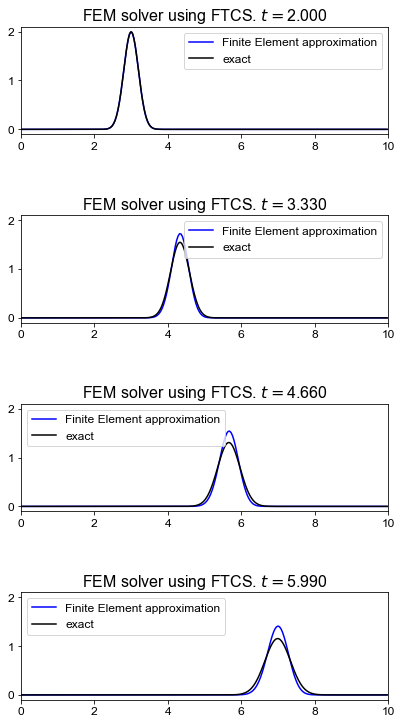

In [44]:
# plotting figure
fig, axs = plt.subplots(4, 1, figsize=(6, 10))
axs = axs.reshape(-1)
fig.tight_layout(w_pad=4, h_pad=5)

x_nodes, ts, uu, r = FEM_advection_diff(U, kappa, N, dt, t_start, t_end, 0, N_loc = 2, N_gi = 3)

xf = np.linspace(0, L, 1000)
for i, n in enumerate(np.linspace(0, uu.shape[1]-1, 4, dtype=int)):
    axs[i].plot(x_nodes, uu[:,n], 'b-', label='Finite Element approximation')
    # implement the analytical solution c_ex from question 2.
    axs[i].plot(xf, c_ex(U, kappa, x0, xf, ts[n]), 'k-', label='exact')
    axs[i].legend(loc='best')
    axs[i].set_xlim(0.0, 10.0)
    axs[i].set_ylim(-0.1, 2.1)
    axs[i].set_title('FEM solver using FTCS. $t=${0:.3f}'.format(ts[n]), fontsize=16)

print('number of Nodes:', N)
print('r parameter:', r)
print('RMS nodal error: ', np.linalg.norm(c_ex(U, kappa, x0, x_nodes, ts[-1]) - uu[:,-1])/np.sqrt(len(x_nodes)))

<div class="answerct">
 
Yes the instability has been fixed, and the approximation overshoots the exact solution as we seen in the finite difference solver.
</div>

<div class="answerct">
 
Now we revert to original N and see performances of BTCS and Crank-Nicolson.
</div>

In [45]:
# revert to original N
N = 500

<div class="answerct">

## BTCS
</div>

number of Nodes: 500
r parameter: 0.25000000000001066
RMS nodal error:  0.03429521909128881


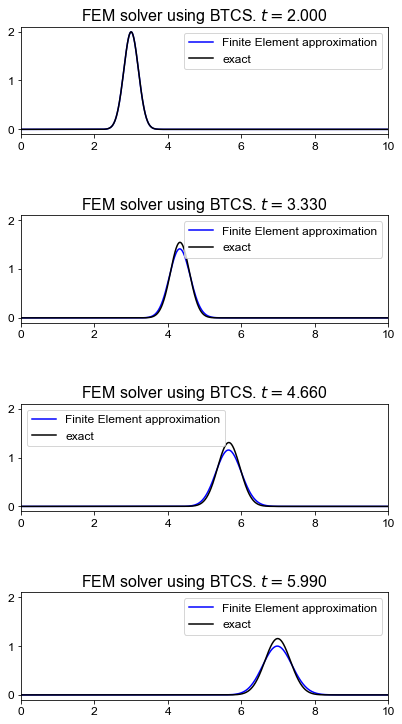

In [46]:
# plotting figure
fig, axs = plt.subplots(4, 1, figsize=(6, 10))
axs = axs.reshape(-1)
fig.tight_layout(w_pad=4, h_pad=5)

x_nodes, ts, uu, r = FEM_advection_diff(U, kappa, N, dt, t_start, t_end, 1, N_loc = 2, N_gi = 3)

xf = np.linspace(0, L, 1000)
for i, n in enumerate(np.linspace(0, uu.shape[1]-1, 4, dtype=int)):
    axs[i].plot(x_nodes, uu[:,n], 'b-', label='Finite Element approximation')
    # implement the analytical solution c_ex from question 2.
    axs[i].plot(xf, c_ex(U, kappa, x0, xf, ts[n]), 'k-', label='exact')
    axs[i].legend(loc='best')
    axs[i].set_xlim(0.0, 10.0)
    axs[i].set_ylim(-0.1, 2.1)
    axs[i].set_title('FEM solver using BTCS. $t=${0:.3f}'.format(ts[n]), fontsize=16)

print('number of Nodes:', N)
print('r parameter:', r)
print('RMS nodal error: ', sl.norm(uu[:, -1] - c_ex(U, kappa, x0, x_nodes, ts[-1])) / np.sqrt(len(x_nodes)))

<div class="answerct">
 
The approximation tend to undershoot, same as we seen for finite difference method.
</div>

<div class="answerct">

## Crank-Nicolson
</div>

number of Nodes: 500
r parameter: 0.25000000000001066
RMS nodal error:  0.0003119660727471414


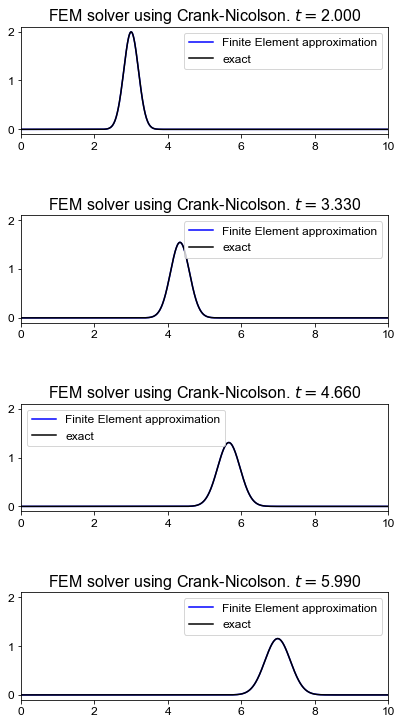

In [47]:
# plotting figure
fig, axs = plt.subplots(4, 1, figsize=(6, 10))
axs = axs.reshape(-1)
fig.tight_layout(w_pad=4, h_pad=5)

x_nodes, ts, uu, r = FEM_advection_diff(U, kappa, N, dt, t_start, t_end, 0.5, N_loc = 2, N_gi = 3)

xf = np.linspace(0, L, 1000)
for i, n in enumerate(np.linspace(0, uu.shape[1]-1, 4, dtype=int)):
    axs[i].plot(x_nodes, uu[:,n], 'b-', label='Finite Element approximation')
    # implement the analytical solution c_ex from question 2.
    axs[i].plot(xf, c_ex(U, kappa, x0, xf, ts[n]), 'k-', label='exact')
    axs[i].legend(loc='best')
    axs[i].set_xlim(0.0, 10.0)
    axs[i].set_ylim(-0.1, 2.1)
    axs[i].set_title('FEM solver using Crank-Nicolson. $t=${0:.3f}'.format(ts[n]), fontsize=16)

print('number of Nodes:', N)
print('r parameter:', r)
print('RMS nodal error: ', sl.norm(uu[:, -1] - c_ex(U, kappa, x0, x_nodes, ts[-1])) / np.sqrt(len(x_nodes)))

<div class="answerct">
 
The approximation tend to be more precise than the formal two, same as we seen for finite difference method.
</div>

<div class="answerct">
 
As our analysis for finite difference solver, the BTCS and Crank-Nicolson enables a large $r$ parameter, let's see if it's still the case for our finite element solver.
</div>

In [142]:
# set a big N
N = 2000

number of Nodes: 2000
r parameter: 4.000000000001592
RMS nodal error:  0.03426539225337564


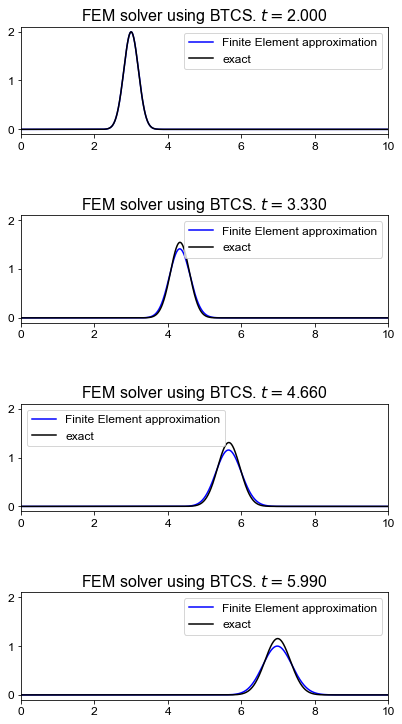

In [82]:
# plotting figure
fig, axs = plt.subplots(4, 1, figsize=(6, 10))
axs = axs.reshape(-1)
fig.tight_layout(w_pad=4, h_pad=5)

x_nodes, ts, uu, r = FEM_advection_diff(U, kappa, N, dt, t_start, t_end, 1, N_loc = 2, N_gi = 3)

xf = np.linspace(0, L, 1000)
for i, n in enumerate(np.linspace(0, uu.shape[1]-1, 4, dtype=int)):
    axs[i].plot(x_nodes, uu[:,n], 'b-', label='Finite Element approximation')
    # implement the analytical solution c_ex from question 2.
    axs[i].plot(xf, c_ex(U, kappa, x0, xf, ts[n]), 'k-', label='exact')
    axs[i].legend(loc='best')
    axs[i].set_xlim(0.0, 10.0)
    axs[i].set_ylim(-0.1, 2.1)
    axs[i].set_title('FEM solver using BTCS. $t=${0:.3f}'.format(ts[n]), fontsize=16)

print('number of Nodes:', N)
print('r parameter:', r)
print('RMS nodal error: ', sl.norm(uu[:, -1] - c_ex(U, kappa, x0, x_nodes, ts[-1])) / np.sqrt(len(x_nodes)))

number of Nodes: 2000
r parameter: 4.000000000001592
RMS nodal error:  0.00031421011158568334


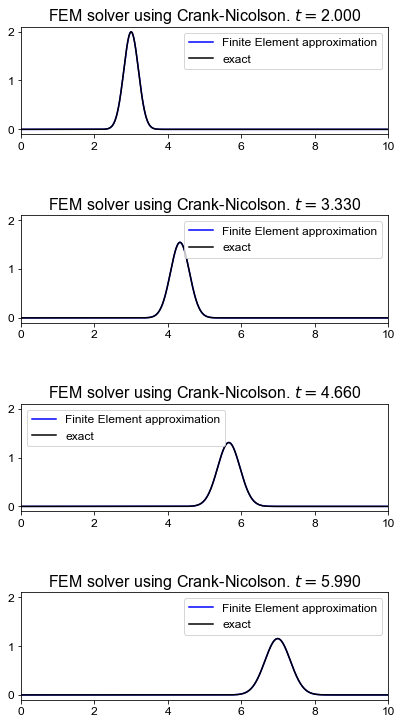

In [83]:
# plotting figure
fig, axs = plt.subplots(4, 1, figsize=(6, 10))
axs = axs.reshape(-1)
fig.tight_layout(w_pad=4, h_pad=5)

x_nodes, ts, uu, r = FEM_advection_diff(U, kappa, N, dt, t_start, t_end, 0.5, N_loc = 2, N_gi = 3)

xf = np.linspace(0, L, 1000)
for i, n in enumerate(np.linspace(0, uu.shape[1]-1, 4, dtype=int)):
    axs[i].plot(x_nodes, uu[:,n], 'b-', label='Finite Element approximation')
    # implement the analytical solution c_ex from question 2.
    axs[i].plot(xf, c_ex(U, kappa, x0, xf, ts[n]), 'k-', label='exact')
    axs[i].legend(loc='best')
    axs[i].set_xlim(0.0, 10.0)
    axs[i].set_ylim(-0.1, 2.1)
    axs[i].set_title('FEM solver using Crank-Nicolson. $t=${0:.3f}'.format(ts[n]), fontsize=16)

print('number of Nodes:', N)
print('r parameter:', r)
print('RMS nodal error: ', sl.norm(uu[:, -1] - c_ex(U, kappa, x0, x_nodes, ts[-1])) / np.sqrt(len(x_nodes)))

<div class="answerct">
Yes, the BTCS and Crank-Nicolson finite element solvers dont't break stability when the $r$ parameter is big.
</div>

<div class="answerct">

## Reconstructing piecewise linear function on a fixed finer mesh

To consider RMS error on a fixed finer mesh for different choices of node meshes, we introduce a function to reconstruct the piecewise linear function, which projects the nodal solution onto the fixed mesh.

The following function is altered from the function in lecture-11, but avoid implementing the hat functions.

Suppose a single point $\boldsymbol{a} = (x', c')$, and $ x' \in [x_i, x_{i+1}]$, where $x_i, x_{i+1} \in$ {nodes we use for FEM}, as well as it lies on the segment $[(x_i, c_{x_i}), (x_{i+1}, c_{x_{i+1}})]$ we would have the following property (using similarity of triangles) :

\begin{align*} 
\frac{c'- c_{x_i}}{c_{x_{i+1}} - c_{x_i}} &= \frac{x' - x_i}{x_{i+1} - x_i}\\
\iff
c' &= \left(c_{x_{i+1}} - c_{x_i}\right) \, \frac{x' - x_i}{x_{i+1} - x_i} + c_{x_i}\\
&= \frac{x_{i+1} - x'}{x_{i+1} - x_i} \, c_{x_i} + \frac{x' - x_i}{x_{i+1} - x_i} \, c_{x_{i+1}}
\end{align*}






</div>

In [48]:
# a function to reconstruct the p/w linear function, but alter a bit to aviod implementing hat functions.
def pwlinear(x_nodes, y_nodes, x):
    """Function to return f_h(x) at locations given in x, 
    with corresponding weights given in y_nodes.
    """
    val = np.zeros_like(x)
    # computing denominator dx
    dx = x_nodes[1] - x_nodes[0]
    # loop over x values, equivalently the basis functions
    for i in range(len(x)):
        # which mesh node is directly to the left of x[i] ?
        node = np.where( x[i] >= x_nodes )[0][-1]
        # deal with problem of hitting over the last periodic node
        if node == len(x_nodes) - 1:
            next_node = 0
        else:
            next_node = node + 1
        # add together the contributions from the two hat functions at this x location - 
        # the weight for the value centred on "node" (to the left)
        weight_node = dx + x_nodes[node] - x[i]
        # and "node+1" (to the right)
        weight_node_next = x[i] - x_nodes[node]
        # now take the weighted sum of these two hat functions
        val[i] = (y_nodes[node] * weight_node + y_nodes[next_node] * weight_node_next) / dx
    return val

<div class="answerct">

The following is a trial to illustrate how our p/w function works for a certain solution. 
</div>

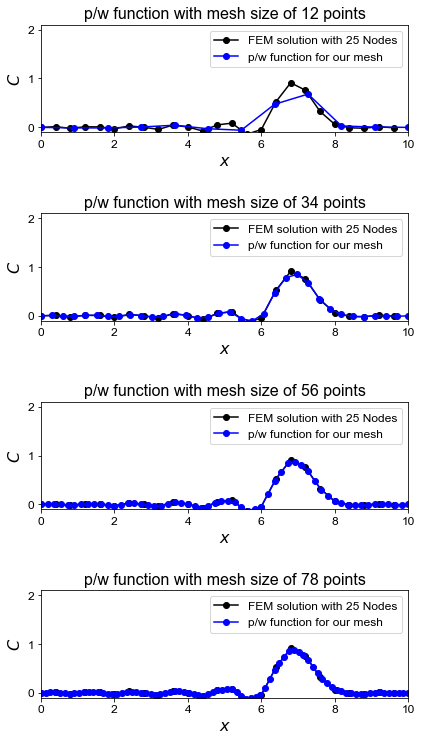

In [49]:
# set a trial
N = 25
x_node, ts, uu, r = FEM_advection_diff(U, kappa, N, dt, t_start, t_end, 0.5, N_loc = 2, N_gi = 3)
Ns = range(12, 100, 22)
x_fine = np.linspace(0,L,12)

# plotting figure
fig, axs = plt.subplots(4, 1, figsize=(6, 10))
axs = axs.reshape(-1)
fig.tight_layout(w_pad=4, h_pad=5)

for i, n in enumerate(Ns):
    axs[i].plot(x_node, uu[:,-1], 'ko-', label='FEM solution with {0:} Nodes'.format(N))
    x_fine = np.linspace(0,L,n)
    axs[i].plot(x_fine, pwlinear(x_node, uu[:, -1], x_fine), 'bo-', label='p/w function for our mesh')
    axs[i].legend(loc='best')
    axs[i].set_xlim(0.0, 10.0)
    axs[i].set_ylim(-0.1, 2.1)
    axs[i].set_title('p/w function with mesh size of {0:} points'.format(n), fontsize=16)
    axs[i].set_xlabel('$x$', fontsize=16)
    axs[i].set_ylabel('$C$', fontsize=16)


<div class=answerct">

## Convergence analysis for the finite element solver

</div>

<div class=answerct">

### A convergence analysis over $\Delta x$

Let's check how the error converges with $\Delta x$.

We will compute the RMS error at the nodes only, but will also evaluate both the exact solution and the p/w linear numerical approximation on a finer mesh and compute the RMS error of the difference - this will be an approximation to the L2 error.

We will keep other conditions to be the same, only change parameter $\theta $.
</div>

In [50]:
# choose a relatively small dt
dt = 0.0001

# use the same conditions as in question 2
U = 1
kappa = 0.06
L = 10.
t_start = 2.
t_end = t_start + 4.
x0 = 1.0

# let's do the RMS on a fine mesh to approximate the L2 norm
x_fine = np.linspace(0,L,1000)

# the range of dxs we use, from 10./16 = 0.625 to 10./512 = 0.0195.
Ns = [2**p for p in range(4, 9)]

In [51]:
# a matrix to store nodal and fine RMS error
errors_dx_FTCS = np.zeros((2,len(Ns)))

for i, node in enumerate(Ns):
    
    x_node, ts, uu, r = FEM_advection_diff(U, kappa, node, dt, t_start, t_end, 0, N_loc = 2, N_gi = 3)
    errors_dx_FTCS[0,i] = sl.norm(uu[:, -1] - c_ex(U, kappa, x0, x_node, ts[-1])) / np.sqrt(len(x_node))
    errors_dx_FTCS[1,i] = sl.norm(pwlinear(x_node, uu[:, -1], x_fine) - c_ex(U, kappa, x0, x_fine, ts[-1])) / np.sqrt(len(x_fine))

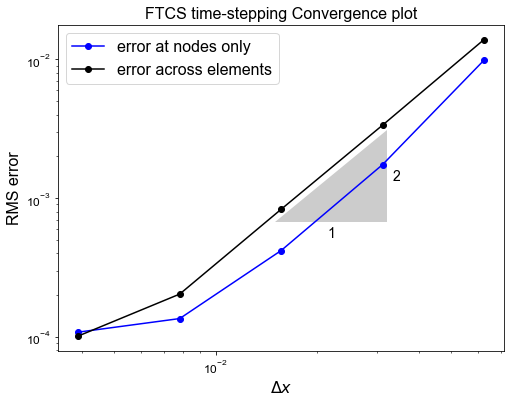

In [52]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('RMS error', fontsize=16)
ax1.set_title('FTCS time-stepping Convergence plot', fontsize=16)
ax1.loglog(1/ np.array(Ns), errors_dx_FTCS[0,:], 'bo-', label='error at nodes only')
ax1.loglog(1/ np.array(Ns), errors_dx_FTCS[1,:], 'ko-', label='error across elements')
ax1.legend(loc='best', fontsize=16)
annotation.slope_marker((1.5e-2, 6.7e-4), (2, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

In [53]:
# a matrix to store nodal and fine RMS error
errors_dx_BTCS = np.zeros((2,len(Ns)))

for i, node in enumerate(Ns):
    
    x_node, ts, uu, r = FEM_advection_diff(U, kappa, node, dt, t_start, t_end, 1, N_loc = 2, N_gi = 3)
    errors_dx_BTCS[0,i] = sl.norm(uu[:, -1] - c_ex(U, kappa, x0, x_node, ts[-1])) / np.sqrt(len(x_node))
    errors_dx_BTCS[1,i] = sl.norm(pwlinear(x_node, uu[:, -1], x_fine) - c_ex(U, kappa, x0, x_fine, ts[-1])) / np.sqrt(len(x_fine))

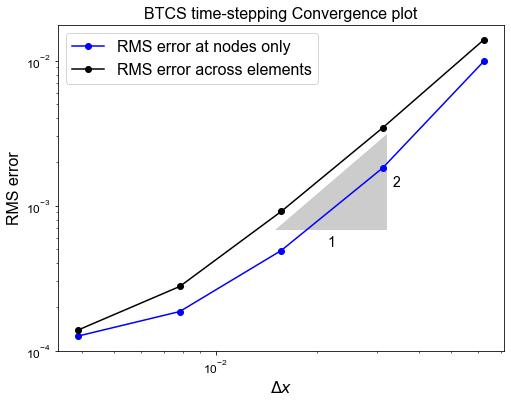

In [54]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('RMS error', fontsize=16)
ax1.set_title('BTCS time-stepping Convergence plot', fontsize=16)
ax1.loglog(1/ np.array(Ns), errors_dx_BTCS[0,:], 'bo-', label='RMS error at nodes only')
ax1.loglog(1/ np.array(Ns), errors_dx_BTCS[1,:], 'ko-', label='RMS error across elements')
ax1.legend(loc='best', fontsize=16)
annotation.slope_marker((1.5e-2, 6.75e-4), (2, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

In [55]:
# a matrix to store nodal and fine RMS error
errors_dx_CN = np.zeros((2,len(Ns)))

for i, node in enumerate(Ns):
    
    x_node, ts, uu, r = FEM_advection_diff(U, kappa, node, dt, t_start, t_end, 0.5, N_loc = 2, N_gi = 3)
    errors_dx_CN[0,i] = sl.norm(uu[:, -1] - c_ex(U, kappa, x0, x_node, ts[-1])) / np.sqrt(len(x_node))
    errors_dx_CN[1,i] = sl.norm(pwlinear(x_node, uu[:, -1], x_fine) - c_ex(U, kappa, x0, x_fine, ts[-1])) / np.sqrt(len(x_fine))

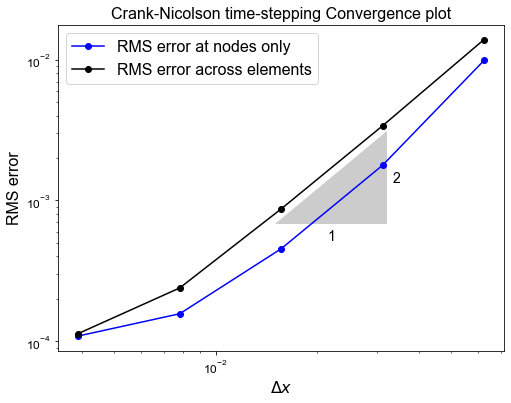

In [56]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('RMS error', fontsize=16)
ax1.set_title('Crank-Nicolson time-stepping Convergence plot', fontsize=16)
ax1.loglog(1/ np.array(Ns), errors_dx_CN[0,:], 'bo-', label='RMS error at nodes only')
ax1.loglog(1/ np.array(Ns), errors_dx_CN[1,:], 'ko-', label='RMS error across elements')
ax1.legend(loc='best', fontsize=16) 
annotation.slope_marker((1.5e-2, 6.75e-4), (2, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

<div class=answerct">

From the plots above, we could observe the patterns of the convergence plots for the three time stepping method is very similar, this makes sence because we have the same spatial structures for three methods, only iteration schemes over time is changed, but notice they still have difference over values.
               
Moreover, we could see the RMS nodal error is always lower than the RMS error across elements, and the RMS error across the elements have a strong convergence order of 2 when $\Delta x$ is appropriately big.

</div>

<div class=answerct">

### A convergence analysis over $\Delta t$

Let's check how the error converges with $\Delta t$, same as we do for $\Delta x$

</div>

In [57]:
# the same set of conditions as in question 2

# we should set a relatively small dx
N = 100

# set other parameters appropriately
U = 1e-4
kappa = 1e-8
L = 0.01
t_start = 2
t_end = t_start + 30
x0 = 0.001

# the range of dts we use
dts = np.arange(0.1, 0.15,  0.01)

# let's do the RMS on a fine mesh to approximate the L2 norm
x_fine = np.linspace(0,L,1000)

In [58]:
errors_dt_FTCS = np.zeros((2, len(dts)))

for i, idt in enumerate(dts):
    x_node, ts, uu, r = FEM_advection_diff(U, kappa, N, idt, t_start, t_end, 0, N_loc = 2, N_gi = 3)
    errors_dt_FTCS[0,i] = sl.norm(uu[:, -1] - c_ex(U, kappa, x0, x_node, ts[-1])) / np.sqrt(len(x_node))
    errors_dt_FTCS[1,i] = sl.norm(pwlinear(x_node, uu[:, -1], x_fine) - c_ex(U, kappa, x0, x_fine, ts[-1])) / np.sqrt(len(x_fine))

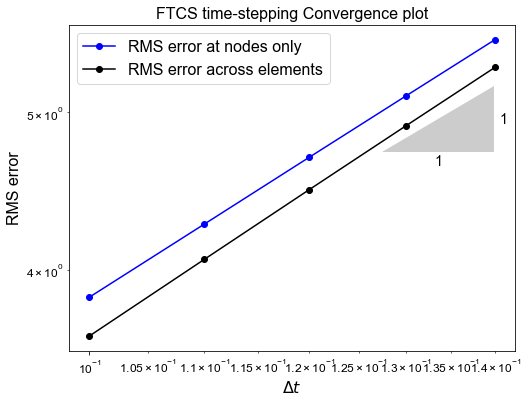

In [59]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$\Delta t$', fontsize=16)
ax1.set_ylabel('RMS error', fontsize=16)
ax1.set_title('FTCS time-stepping Convergence plot', fontsize=16)
ax1.loglog(dts, errors_dt_FTCS[0,:], 'bo-', label='RMS error at nodes only')
ax1.loglog(dts, errors_dt_FTCS[1,:], 'ko-', label='RMS error across elements')
ax1.legend(loc='best', fontsize=16) 
annotation.slope_marker((1.275e-1, 4.73e0), (1, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

In [60]:
errors_dt_BTCS = np.zeros((2, len(dts)))

for i, idt in enumerate(dts):
    x_node, ts, uu, r = FEM_advection_diff(U, kappa, N, idt, t_start, t_end, 1, N_loc = 2, N_gi = 3)
    errors_dt_BTCS[0,i] = sl.norm(uu[:, -1] - c_ex(U, kappa, x0, x_node, ts[-1])) / np.sqrt(len(x_node))
    errors_dt_BTCS[1,i] = sl.norm(pwlinear(x_node, uu[:, -1], x_fine) - c_ex(U, kappa, x0, x_fine, ts[-1])) / np.sqrt(len(x_fine))

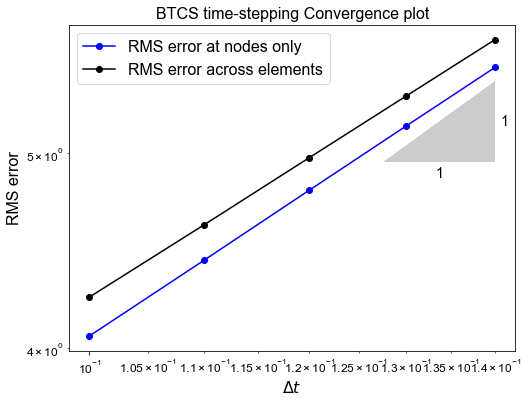

In [61]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$\Delta t$', fontsize=16)
ax1.set_ylabel('RMS error', fontsize=16)
ax1.set_title('BTCS time-stepping Convergence plot', fontsize=16)
ax1.loglog(dts, errors_dt_BTCS[0,:], 'bo-', label='RMS error at nodes only')
ax1.loglog(dts, errors_dt_BTCS[1,:], 'ko-', label='RMS error across elements')
ax1.legend(loc='best', fontsize=16)
annotation.slope_marker((1.276e-1, 4.95e0), (1, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

In [62]:
errors_dt_CN = np.zeros((2, len(dts)))

for i, idt in enumerate(dts):
    x_node, ts, uu, r = FEM_advection_diff(U, kappa, N, idt, t_start, t_end, 0.5, N_loc = 2, N_gi = 3)
    errors_dt_CN[0,i] = sl.norm(uu[:, -1] - c_ex(U, kappa, x0, x_node, ts[-1])) / np.sqrt(len(x_node))
    errors_dt_CN[1,i] = sl.norm(pwlinear(x_node, uu[:, -1], x_fine) - c_ex(U, kappa, x0, x_fine, ts[-1])) / np.sqrt(len(x_fine))

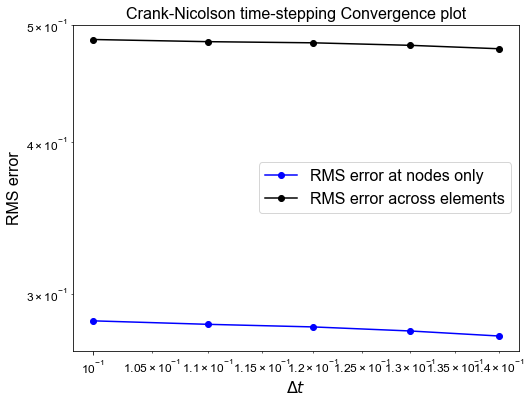

In [63]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$\Delta t$', fontsize=16)
ax1.set_ylabel('RMS error', fontsize=16)
ax1.set_title('Crank-Nicolson time-stepping Convergence plot', fontsize=16)
ax1.loglog(dts, errors_dt_CN[0,:], 'bo-', label='RMS error at nodes only')
ax1.loglog(dts, errors_dt_CN[1,:], 'ko-', label='RMS error across elements')
ax1.legend(loc='best', fontsize=16) 

<div class=answerct">

From the plots above, we observe that the $L_2$ RMS nodal (fine mesh) error of FTCS and BTCS have a strong convergence order of 1 over $\Delta t$, and Crank-Nicolson seemed insensitive to the change of $\Delta t$ as this region, which is very similar with the result we have for finite difference methods.

So let's choose some big $\Delta t$ s to see if the Crank-Nicolson show behaviors of convergence.


</div>

In [64]:
# extend the region of dts
dts_extend = np.arange(0.5, 2.5,  0.1)

errors_dt_CN_extend = np.zeros((2, len(dts_extend)))

for i, idt in enumerate(dts_extend):
    x_node, ts, uu, r = FEM_advection_diff(U, kappa, N, idt, t_start, t_end, 0.5, N_loc = 2, N_gi = 3)
    errors_dt_CN_extend[0,i] = sl.norm(uu[:, -1] - c_ex(U, kappa, x0, x_node, ts[-1])) / np.sqrt(len(x_node))
    errors_dt_CN_extend[1,i] = sl.norm(pwlinear(x_node, uu[:, -1], x_fine) - c_ex(U, kappa, x0, x_fine, ts[-1])) / np.sqrt(len(x_fine))

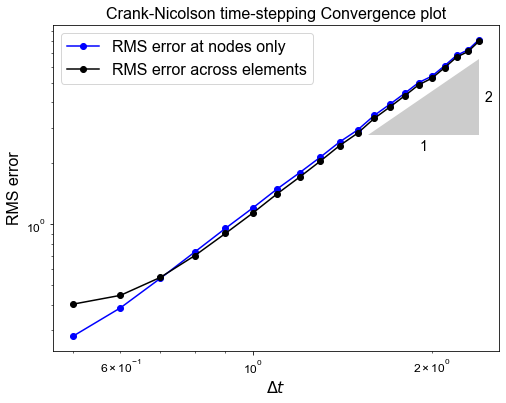

In [65]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$\Delta t$', fontsize=16)
ax1.set_ylabel('RMS error', fontsize=16)
ax1.set_title('Crank-Nicolson time-stepping Convergence plot', fontsize=16)
ax1.loglog(dts_extend, errors_dt_CN_extend [0,:], 'bo-', label='RMS error at nodes only')
ax1.loglog(dts_extend, errors_dt_CN_extend [1,:], 'ko-', label='RMS error across elements')
ax1.legend(loc='best', fontsize=16) 
annotation.slope_marker((1.56e0, 2.75e0), (2, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

<div class=answerct">

Yes, the finite element solver with Crank-Nicolson stepping also shows a strong convergence rate of 2 over $\Delta t$.


</div>

<div class=answerct">

## Comparision between methods over the same problem

Now it's time to mix all the methods we've used so far, two basic ideas called FDM and FEM, as well as 3 time-stepping schemes.
                    
Thus, we could make comparision among $2 \times 3 = 6$ groups.

</div>

<div class=answerct">

### $\Delta x$ convergence
</div>

In [66]:
# a same problem
dt = 0.0001

# use the same conditions as in question 2
U = 1
kappa = 0.06
L = 10.
t_start = 2.
t_end = t_start + 4.
x0 = 1.0

# let's do the RMS on a fine mesh to approximate the L2 norm
x_fine = np.linspace(0,L,1000)

# the range of dxs we use, from 10./16 = 0.625 to 10./512 = 0.0195.
Ns = np.array([2**p for p in range(4, 9)])
dxs = 1./ Ns

In [67]:
method = ['finite difference', 'finite element']
time_stepping = ['FTCS', 'BTCS', 'CN']
theta = [0, 1, 0.5]

group_errors_dx_node = np.zeros((2, 3, len(Ns)))
group_errors_dx_fine = np.zeros_like(group_errors_dx_node)

for i, mi in enumerate(method):
    for j, ts in enumerate(time_stepping):
        for k, nodes in enumerate(Ns):
            if i == 0:
                C, x, t = adv_diff_Gaussian_3solver(dxs[k], dt, t_start, t_end, U, kappa, ts)
                group_errors_dx_node[i, j, k] = sl.norm(C[:, -1] - c_ex(U, kappa, x0, x, t[-1])) / np.sqrt(len(x))
                group_errors_dx_fine[i, j, k] = sl.norm(pwlinear(x, C[:, -1], x_fine) - c_ex(U, kappa, x0, x_fine, t[-1])) / np.sqrt(len(x_fine))
                

            if i == 1 :
                x_node, ts, uu, r = FEM_advection_diff(U, kappa, nodes, dt, t_start, t_end, theta[j], N_loc = 2, N_gi = 3)
                group_errors_dx_node[i, j, k] = sl.norm(uu[:, -1] - c_ex(U, kappa, x0, x_node, ts[-1])) / np.sqrt(len(x_node))
                group_errors_dx_fine[i, j, k] = sl.norm(pwlinear(x_node, uu[:, -1], x_fine) - c_ex(U, kappa, x0, x_fine, ts[-1]))/ np.sqrt(len(x_fine))
                
        

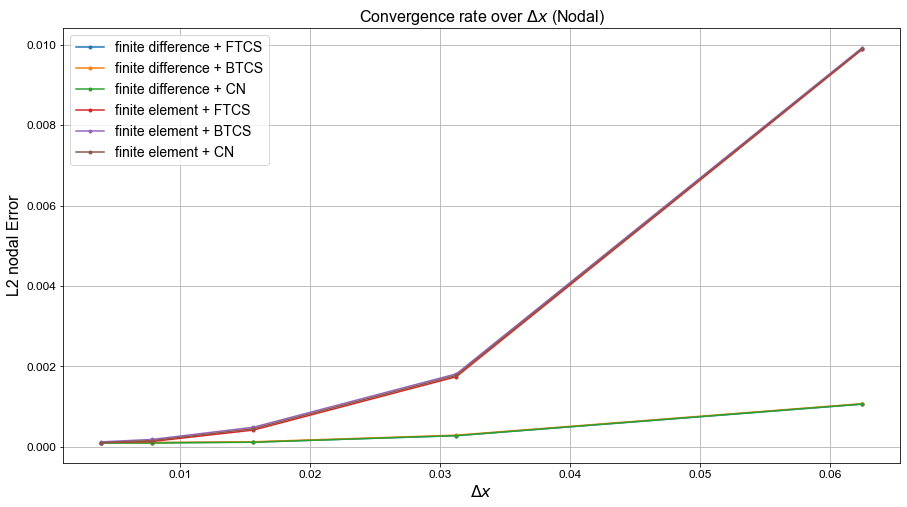

In [68]:
# set up figure
fig, axs = plt.subplots(1, 1, figsize=(15, 8))

for i, mi in enumerate(method):
    for j, ts in enumerate(time_stepping):
        axs.plot(dxs, group_errors_dx_node[i, j, :], '.-', label=r'{0} + {1}'.format(mi, ts))

    
axs.set_xlabel('$\Delta x$', fontsize=16)
axs.set_ylabel('L2 nodal Error', fontsize=16)
axs.set_title(r'Convergence rate over $\Delta x$ (Nodal)', fontsize=16)
axs.grid(True)
axs.legend(loc='best', fontsize=14)

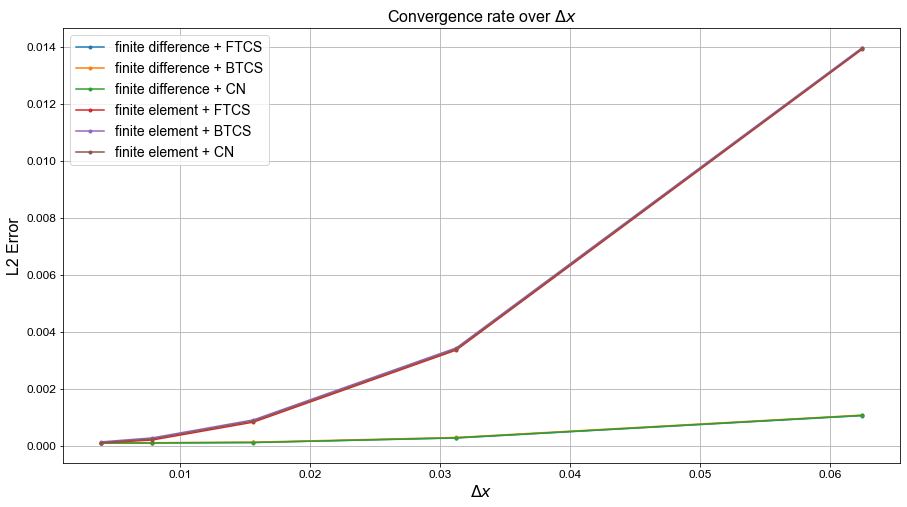

In [69]:
# set up figure
fig, axs = plt.subplots(1, 1, figsize=(15, 8))

for i, mi in enumerate(method):
    for j, ts in enumerate(time_stepping):
        axs.plot(dxs, group_errors_dx_fine[i, j, :], '.-', label=r'{0} + {1}'.format(mi, ts))

    
axs.set_xlabel('$\Delta x$', fontsize=16)
axs.set_ylabel('L2 Error', fontsize=16)
axs.set_title(r'Convergence rate over $\Delta x $', fontsize=16)
axs.grid(True)
axs.legend(loc='best', fontsize=14)

<div class=answerct">

1)The results for the nodal error and error across elements are very similar, thus we can just omit the difference between two plots.
                    
                    
            
2)The most interesting point for this (these) plot(s) is that the 6 groups are clearly devided into two curves.
                    
3)The above curve lies solutions given by finite element solvers, while the below one represents finite difference groups.

4)This indicates the convergence property over $\Delta x$ is strongly related with the basic soler we use, instead of different time-stepping schemes.
                    
5)In addition, the finite different solver is less influenced by the change of $\Delta x$ and tend to make better approximations than finite element solver with with a fixed small $\Delta t$ and same time-stepping scheme.
</div>

<div class=answerct">

### $\Delta t$ convergence
                 
</div>

In [70]:
# same problem to compare dt convergence

# we should set a relatively small dx
N = 100

# set other parameters appropriately
U = 1e-4
kappa = 1e-8
L = 0.01
t_start = 2
t_end = t_start + 30
x0 = 0.001

dx = L/N
# the range of dts we use
dts = np.arange(0.01, 0.15, 0.01)
# let's do the RMS on a fine mesh to approximate the L2 norm
x_fine = np.linspace(0,L,1000)

In [71]:
method = ['finite difference', 'finite element']
time_stepping = ['FTCS', 'BTCS', 'CN']
theta = [0, 1, 0.5]

group_errors_dt_node = np.zeros((2, 3, len(dts)))
group_errors_dt_fine = np.zeros_like(group_errors_dt_node)

for i, mi in enumerate(method):
    for j, ts in enumerate(time_stepping):
        for k, dt in enumerate(dts):
            if i == 0:
                C, x, t = adv_diff_Gaussian_3solver(dx, dt, t_start, t_end, U, kappa, ts)
                group_errors_dt_node[i, j, k] = sl.norm(C[:, -1] - c_ex(U, kappa, x0, x, t[-1])) / np.sqrt(len(x))
                group_errors_dt_fine[i, j, k] = sl.norm(pwlinear(x, C[:, -1], x_fine) - c_ex(U, kappa, x0, x_fine, t[-1])) / np.sqrt(len(x_fine))
                

            if i == 1 :
                x_node, ts, uu, r = FEM_advection_diff(U, kappa, N, dt, t_start, t_end, theta[j], N_loc = 2, N_gi = 3)
                group_errors_dt_node[i, j, k] = sl.norm(uu[:, -1] - c_ex(U, kappa, x0, x_node, ts[-1])) / np.sqrt(len(x_node))
                group_errors_dt_fine[i, j, k] = sl.norm(pwlinear(x_node, uu[:, -1], x_fine) - c_ex(U, kappa, x0, x_fine, ts[-1]))/ np.sqrt(len(x_fine))
                
        

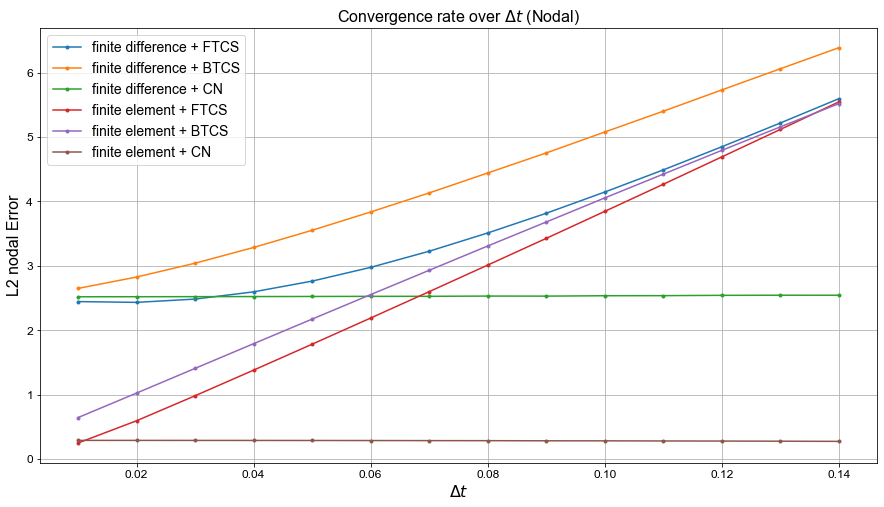

In [72]:
# set up figure
fig, axs = plt.subplots(1, 1, figsize=(15, 8))

for i, mi in enumerate(method):
    for j, ts in enumerate(time_stepping):
        axs.plot(dts, group_errors_dt_node[i, j, :], '.-', label=r'{0} + {1}'.format(mi, ts))

    
axs.set_xlabel('$\Delta t$', fontsize=16)
axs.set_ylabel('L2 nodal Error', fontsize=16)
axs.set_title(r'Convergence rate over $\Delta t$ (Nodal)', fontsize=16)
axs.grid(True)
axs.legend(loc='best', fontsize=14)

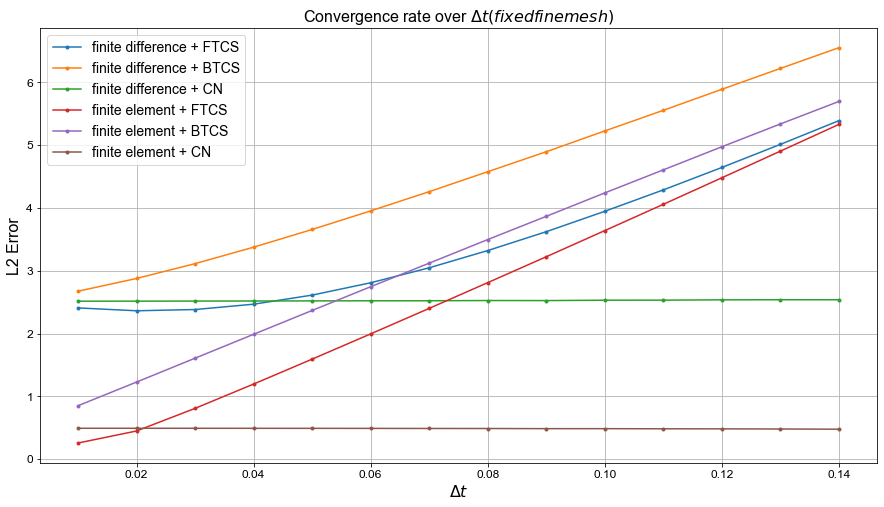

In [73]:
# set up figure
fig, axs = plt.subplots(1, 1, figsize=(15, 8))

for i, mi in enumerate(method):
    for j, ts in enumerate(time_stepping):
        axs.plot(dts, group_errors_dt_fine[i, j, :], '.-', label=r'{0} + {1}'.format(mi, ts))

    
axs.set_xlabel('$\Delta t$', fontsize=16)
axs.set_ylabel('L2 Error', fontsize=16)
axs.set_title(r'Convergence rate over $\Delta t (fixed fine mesh)$', fontsize=16)
axs.grid(True)
axs.legend(loc='best', fontsize=14)

<div class=answerct">

1)Like plots over $\Delta x$, the results for the nodal error and error across elements are very similar, thus we can just omit the difference between two plots.
                    
                           
2)The plot(s) is (are) stightly more complicated than those for $\Delta x$. Those groups using FTCS and BTCS are showing a strong convergence rate of 1 over $\Delta t$, while those with Crank-Nicolson are less sensetive by the increase of $\Delta t$, remaining a small error.
                    
3)In addition, the finite element solver always gives a better approximation than the finite difference method with a fixed small $\Delta x$ and same time-stepping scheme.

                    
</div>

<div class=answerct">

## Final Comments
                    
1)For solving the advection-diffusion equation, upon choose of time-stepping scheme, Crank-Nicolson is always recommond as it beats FTCS and BTCS in accuracy and stability.<br>
</br>
                    
2)It depends on the specific problem/ background whether we should choose the finite difference method or the finite element method. The accuracy for finite difference method is less influenced by the spatial mesh size we use, while the accuracy of finite element method is better when time step sizes are big. Therefore, we should make the decision given the resources and needs (For example, if a very fine spatial mesh is acceptable and we want to get the solution in less time iterations, then we should use FEM)

                    

</div>